# Advanced Regression

## Price Prediction

#### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.

The company is looking at prospective properties to buy to enter the market. A regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not has to be build.

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.


In [1]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

## Content

1. [Reading, understanding and cleaning the data](#ReadAndUnderstand)
2. [Visualize the data](#Visualize)
3. [Data Preparation](#DataPrep)
4. [Splitting the Data into Training and Testing Sets](#Split)
5. [Model Building and Evaluation](#Build)
    1. [Linear Regression](#LR)
    2. [Linear Regression with RFE](#LRRFE)
    3. [Ridge Regression](#RIDGE)
    4. [Lasso Regression](#LASSO)
6. [Observations](#OBS)
7. [Top 5 predictors in lasso](#TOP5)

## 1. Reading, Understanding and cleaning the data<a class="anchor" id="ReadAndUnderstand"></a>

In [2]:
HousePrice = pd.read_csv('train.csv')

In [3]:
HousePrice.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
HousePrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
HousePrice.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
NullPer = (HousePrice.isna().sum()/HousePrice.shape[0]*100)
NullPer[((HousePrice.isna().sum()/HousePrice.shape[0]*100)>0)]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [7]:
# Dropping features having higher percent, as assuming any value for these null could imapact the model prediction

HousePrice.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1,inplace = True)

In [8]:
NullPer = (HousePrice.isna().sum()/HousePrice.shape[0]*100)
NullPer[((HousePrice.isna().sum()/HousePrice.shape[0]*100)>0)]

LotFrontage     17.739726
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

In [9]:
# Fill null value with the max occuring value for LotFrontage and MasVnrArea (numerical)

HousePrice["LotFrontage"].fillna(HousePrice['LotFrontage'].mode(),inplace=True)
HousePrice["MasVnrArea"].fillna(HousePrice['MasVnrArea'].mode(),inplace=True)

Max: 111.5
Min: 27.5


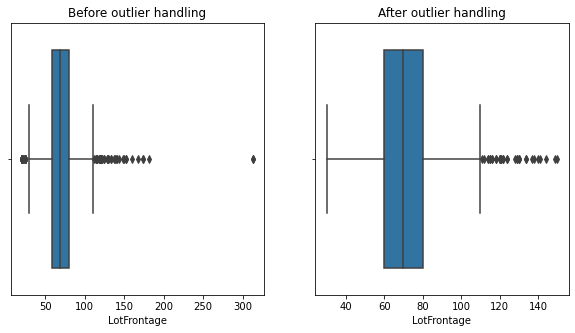

In [10]:
# Remove outliers for LotFrontage

fig, axs = plt.subplots(1,2,figsize=(10,5))

sns.boxplot(HousePrice['LotFrontage'],ax = axs[0])

IQR = HousePrice["LotFrontage"].quantile(0.75) - HousePrice["LotFrontage"].quantile(0.25)
max = HousePrice["LotFrontage"].quantile(0.75) + 1.5 * IQR
min = HousePrice["LotFrontage"].quantile(0.25) - 1.5 * IQR
print("Max:",max)
print("Min:",min)

HousePrice = HousePrice[HousePrice['LotFrontage'] <= 150]
HousePrice = HousePrice[HousePrice['LotFrontage'] >= min]

sns.boxplot(HousePrice['LotFrontage'], ax = axs[1])
axs[0].title.set_text("Before outlier handling")
axs[1].title.set_text("After outlier handling")
fig.show()

Max: 383.125
Min: -229.875


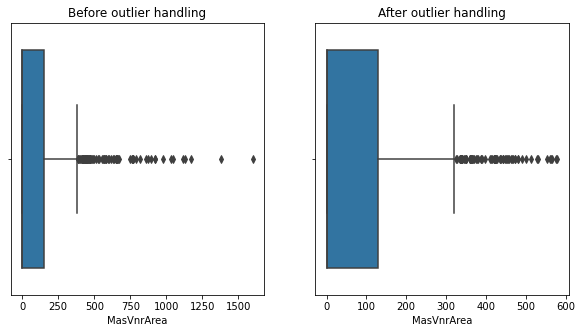

In [11]:
# Remove outliers for MasVnrArea

fig, axs = plt.subplots(1,2,figsize=(10,5))

sns.boxplot(HousePrice['MasVnrArea'],ax = axs[0])

IQR = HousePrice["MasVnrArea"].quantile(0.75) - HousePrice["MasVnrArea"].quantile(0.25)
max = HousePrice["MasVnrArea"].quantile(0.75) + 1.5 * IQR
min = HousePrice["MasVnrArea"].quantile(0.25) - 1.5 * IQR
print("Max:",max)
print("Min:",min)

HousePrice = HousePrice[HousePrice['MasVnrArea'] <= 580]
HousePrice = HousePrice[HousePrice['MasVnrArea'] >= min]

sns.boxplot(HousePrice['MasVnrArea'], ax = axs[1])
axs[0].title.set_text("Before outlier handling")
axs[1].title.set_text("After outlier handling")
fig.show()

In [12]:
HousePrice = HousePrice[~(HousePrice["GarageType"].isna())]

In [13]:
# Fill null value with the max occuring value for following columns (categorical)
cols = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical']

for i in cols:
    print('Replace null value for column ',i,' with max occuring value ',HousePrice[i].mode().values[0])
    HousePrice[i].fillna(HousePrice[i].mode().values[0],inplace=True)

Replace null value for column  BsmtQual  with max occuring value  TA
Replace null value for column  BsmtCond  with max occuring value  TA
Replace null value for column  BsmtExposure  with max occuring value  No
Replace null value for column  BsmtFinType1  with max occuring value  Unf
Replace null value for column  BsmtFinType2  with max occuring value  Unf
Replace null value for column  Electrical  with max occuring value  SBrkr


In [14]:
# Droping Id column since this will not add any value to the model
HousePrice.drop(['Id'],axis=1,inplace = True)

In [15]:
# No Null values

HousePrice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1043 non-null   int64  
 1   MSZoning       1043 non-null   object 
 2   LotFrontage    1043 non-null   float64
 3   LotArea        1043 non-null   int64  
 4   Street         1043 non-null   object 
 5   LotShape       1043 non-null   object 
 6   LandContour    1043 non-null   object 
 7   Utilities      1043 non-null   object 
 8   LotConfig      1043 non-null   object 
 9   LandSlope      1043 non-null   object 
 10  Neighborhood   1043 non-null   object 
 11  Condition1     1043 non-null   object 
 12  Condition2     1043 non-null   object 
 13  BldgType       1043 non-null   object 
 14  HouseStyle     1043 non-null   object 
 15  OverallQual    1043 non-null   int64  
 16  OverallCond    1043 non-null   int64  
 17  YearBuilt      1043 non-null   int64  
 18  YearRemo

Max: 535000.0
Min: -189500.0


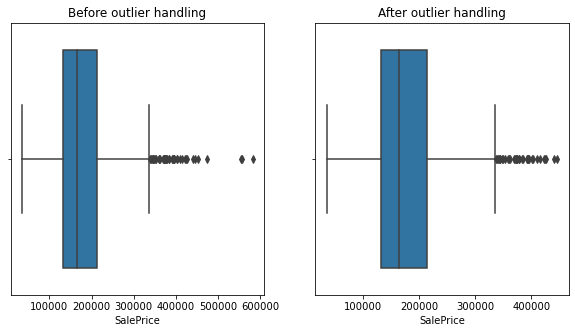

In [16]:
# Remove outliers for SalePrice

fig, axs = plt.subplots(1,2,figsize=(10,5))

sns.boxplot(HousePrice['SalePrice'],ax = axs[0])

IQR = HousePrice["SalePrice"].quantile(0.75) - HousePrice["MasVnrArea"].quantile(0.25)
max = HousePrice["SalePrice"].quantile(0.75) + 1.5 * IQR
min = HousePrice["SalePrice"].quantile(0.25) - 1.5 * IQR
print("Max:",max)
print("Min:",min)

HousePrice = HousePrice[HousePrice['SalePrice'] <= 450000]
HousePrice = HousePrice[HousePrice['SalePrice'] >= min]

sns.boxplot(HousePrice['SalePrice'], ax = axs[1])
axs[0].title.set_text("Before outlier handling")
axs[1].title.set_text("After outlier handling")
fig.show()

In [17]:
HousePrice.shape

(1038, 75)

In [18]:
# Convert the YearBuilt,YearRemodAdd, YrSold , GarageYrBlt into age to make it continuous variables.

HousePrice['HouseAge'] = HousePrice['YrSold'] - HousePrice['YearBuilt']
HousePrice['GarageAge'] = HousePrice['YrSold'] - HousePrice['GarageYrBlt']
HousePrice['RemodAge'] = HousePrice['YrSold'] - HousePrice['YearRemodAdd']


In [19]:
# Convert MoSold to categorical variable

HousePrice['MoSold'] = HousePrice[['MoSold']].apply(lambda x: x.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}),axis=1)

In [20]:
HousePrice['MoSold']

0        feb
1        may
2        sep
3        feb
4        dec
        ... 
1455     aug
1456     feb
1457     may
1458     apr
1459    june
Name: MoSold, Length: 1038, dtype: object

## 2. Visualize the data<a class="anchor" id="Visualize"></a>

#### Visualizing Numeric Variables
- For visualizing the numeric variables we will create pairplots

In [21]:
# Numeric variables

NumCols = HousePrice.select_dtypes(include=['int64','float64']).columns

In [22]:
len(NumCols)

39

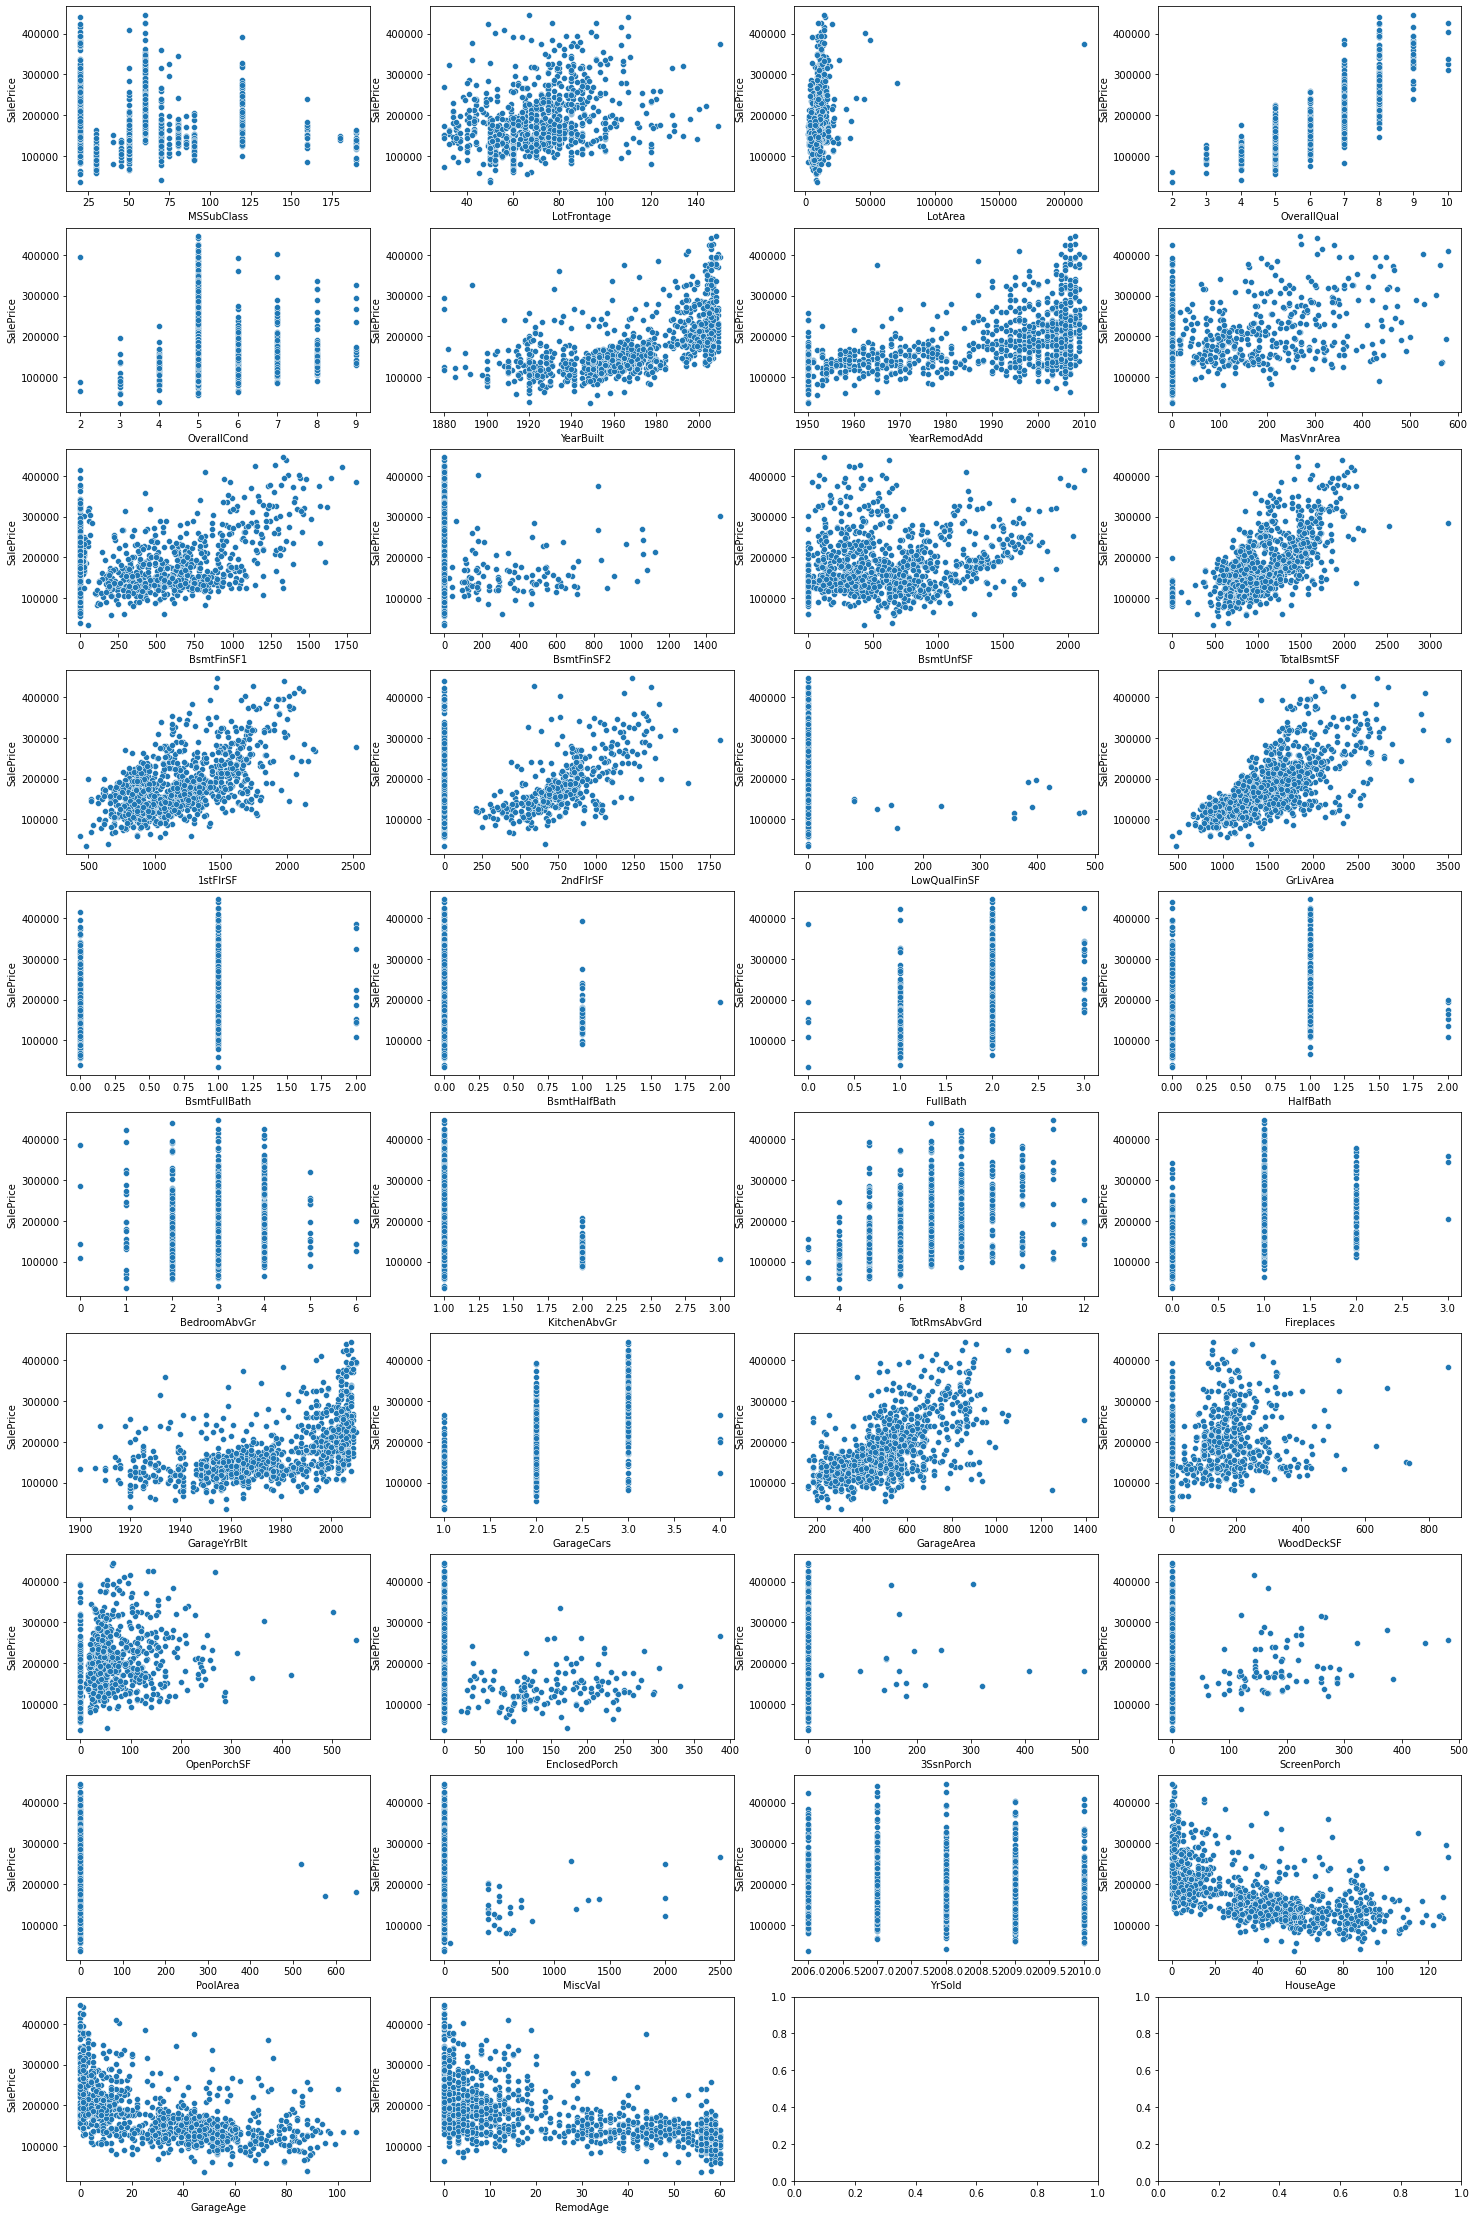

In [23]:
fig, axs = plt.subplots(10,4,figsize=(25,40))
j = 0
k = -1
for i in NumCols:
    if(i != 'SalePrice'):
        if(k>2):
            j=j+1
            k=0
        else:
            k=k+1
        sns.scatterplot(data=HousePrice,x = i, y = 'SalePrice',ax=axs[j][k])

fig.show()

### Observations

- Following variables have **good** linear relationship with the SalePrice:
  - LotArea
  - TotalBsmtSF
  - 1stFlrSF
  - 2ndFlrSF
  - GrLivArea
  - GarageArea
  - WoodDeckSF
  - OpenPorchSF
  
  
- Following Variable have **moderate** linear relationship with the SalePrice.Here we could see that with the increase in these values the saleprice has only a slight increase and majority of the saleprice is b/w certain values
  - LotFrontage
  - YearBuilt
  - YearRemodAdd
  - MasVnrArea
  - BsmtFinSF1
  - BsmtUnfSF
  - GarageYrBlt


- Following variables have inverse relationshop with SalePrice.
    - HouseAge
    - GarageAge
    - RemodAge
- As these values increases the saleprice slightly reduces.


- For the following variables we could see that the majority of the values are the same and is mostly zero
  - LowQualFinSF
  - 3SsnPorch
  - PoolArea
  - MiscVal

In [24]:
# Checking the values for the variables where the majority of the values are the same.
cols = ['LowQualFinSF','3SsnPorch','PoolArea','MiscVal']
for i in cols:
    print(i)
    print(HousePrice[i].value_counts())

LowQualFinSF
0      1024
360       2
80        2
144       1
390       1
420       1
473       1
156       1
232       1
481       1
120       1
397       1
384       1
Name: LowQualFinSF, dtype: int64
3SsnPorch
0      1020
180       2
168       2
144       2
320       1
407       1
140       1
508       1
245       1
196       1
162       1
23        1
216       1
96        1
153       1
304       1
Name: 3SsnPorch, dtype: int64
PoolArea
0      1035
648       1
576       1
519       1
Name: PoolArea, dtype: int64
MiscVal
0       1004
400        9
500        5
2000       3
600        3
450        2
700        2
800        1
480        1
1300       1
1200       1
54         1
620        1
560        1
1400       1
1150       1
2500       1
Name: MiscVal, dtype: int64


In [25]:
# we can drop these columns as this will not add any value to our model

HousePrice.drop(cols,axis=1,inplace=True)

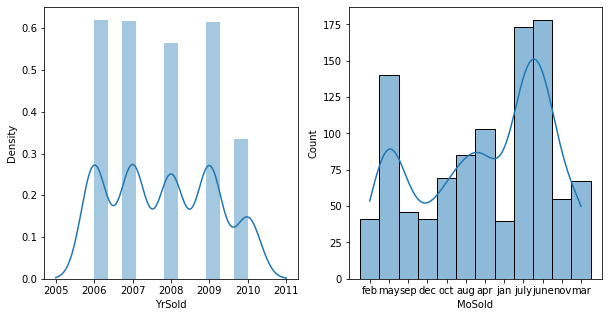

In [26]:
# Distribution of YrSold and MoSold

fig, axs = fig, axs = plt.subplots(1,2,figsize=(10,5))

sns.distplot(HousePrice['YrSold'],kde=True,ax=axs[0])
sns.histplot(HousePrice['MoSold'],kde=True,ax=axs[1])
fig.show()

#Observation
# Year doesn't seem to have much impact
# Most no of sales happened May,June,July

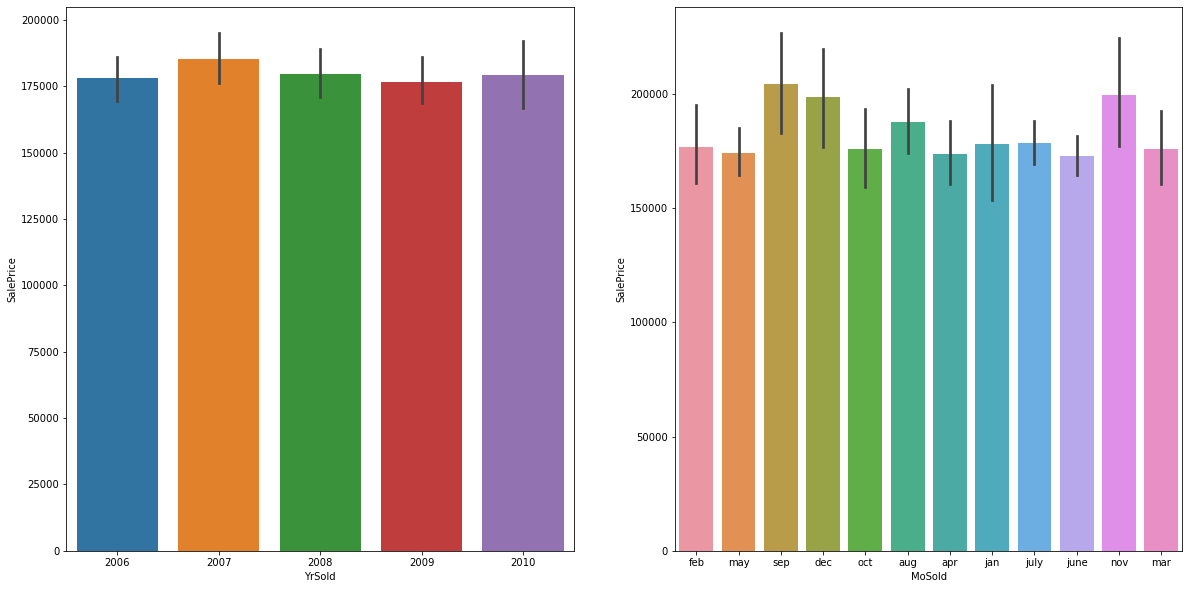

In [27]:
# YrSold vs Sale Price / MoSold vs Sale Price

fig, axs = fig, axs = plt.subplots(1,2,figsize=(20,10))
sns.barplot(data=HousePrice,x='YrSold', y = 'SalePrice',ax=axs[0])
sns.barplot(data=HousePrice,x='MoSold', y = 'SalePrice',ax=axs[1])
fig.show()

#Observation:
# Don't see much change in the total saleprice across years and month

In [28]:
#As we don't see any major influence of yrsold on sales price and also since age also is derived from year sold
# we can drop this feature as well

HousePrice.drop(['YrSold'],axis=1,inplace=True)

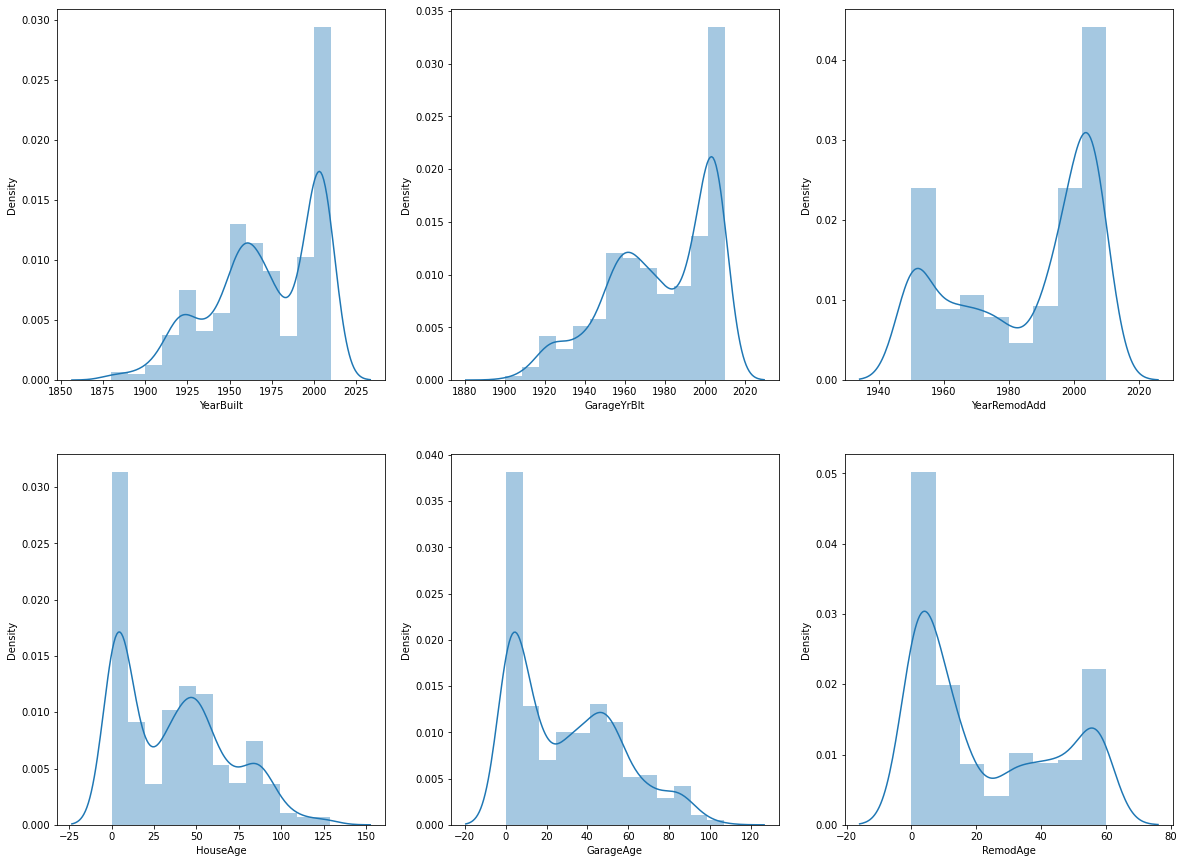

In [29]:
fig, axs = fig, axs = plt.subplots(2,3,figsize=(20,15))

sns.distplot(HousePrice['YearBuilt'],kde=True,ax=axs[0][0])
sns.distplot(HousePrice['GarageYrBlt'],kde=True,ax=axs[0][1])
sns.distplot(HousePrice['YearRemodAdd'],kde=True,ax=axs[0][2])

sns.distplot(HousePrice['HouseAge'],kde=True,ax=axs[1][0])
sns.distplot(HousePrice['GarageAge'],kde=True,ax=axs[1][1])
sns.distplot(HousePrice['RemodAge'],kde=True,ax=axs[1][2])
fig.show()

In [30]:
#If we see the about graphs we could understand that the plots for Age and its corresponding year is almost
# similar hence we could drop the years now

HousePrice.drop(['YearBuilt','GarageYrBlt','YearRemodAdd'],axis=1,inplace=True)

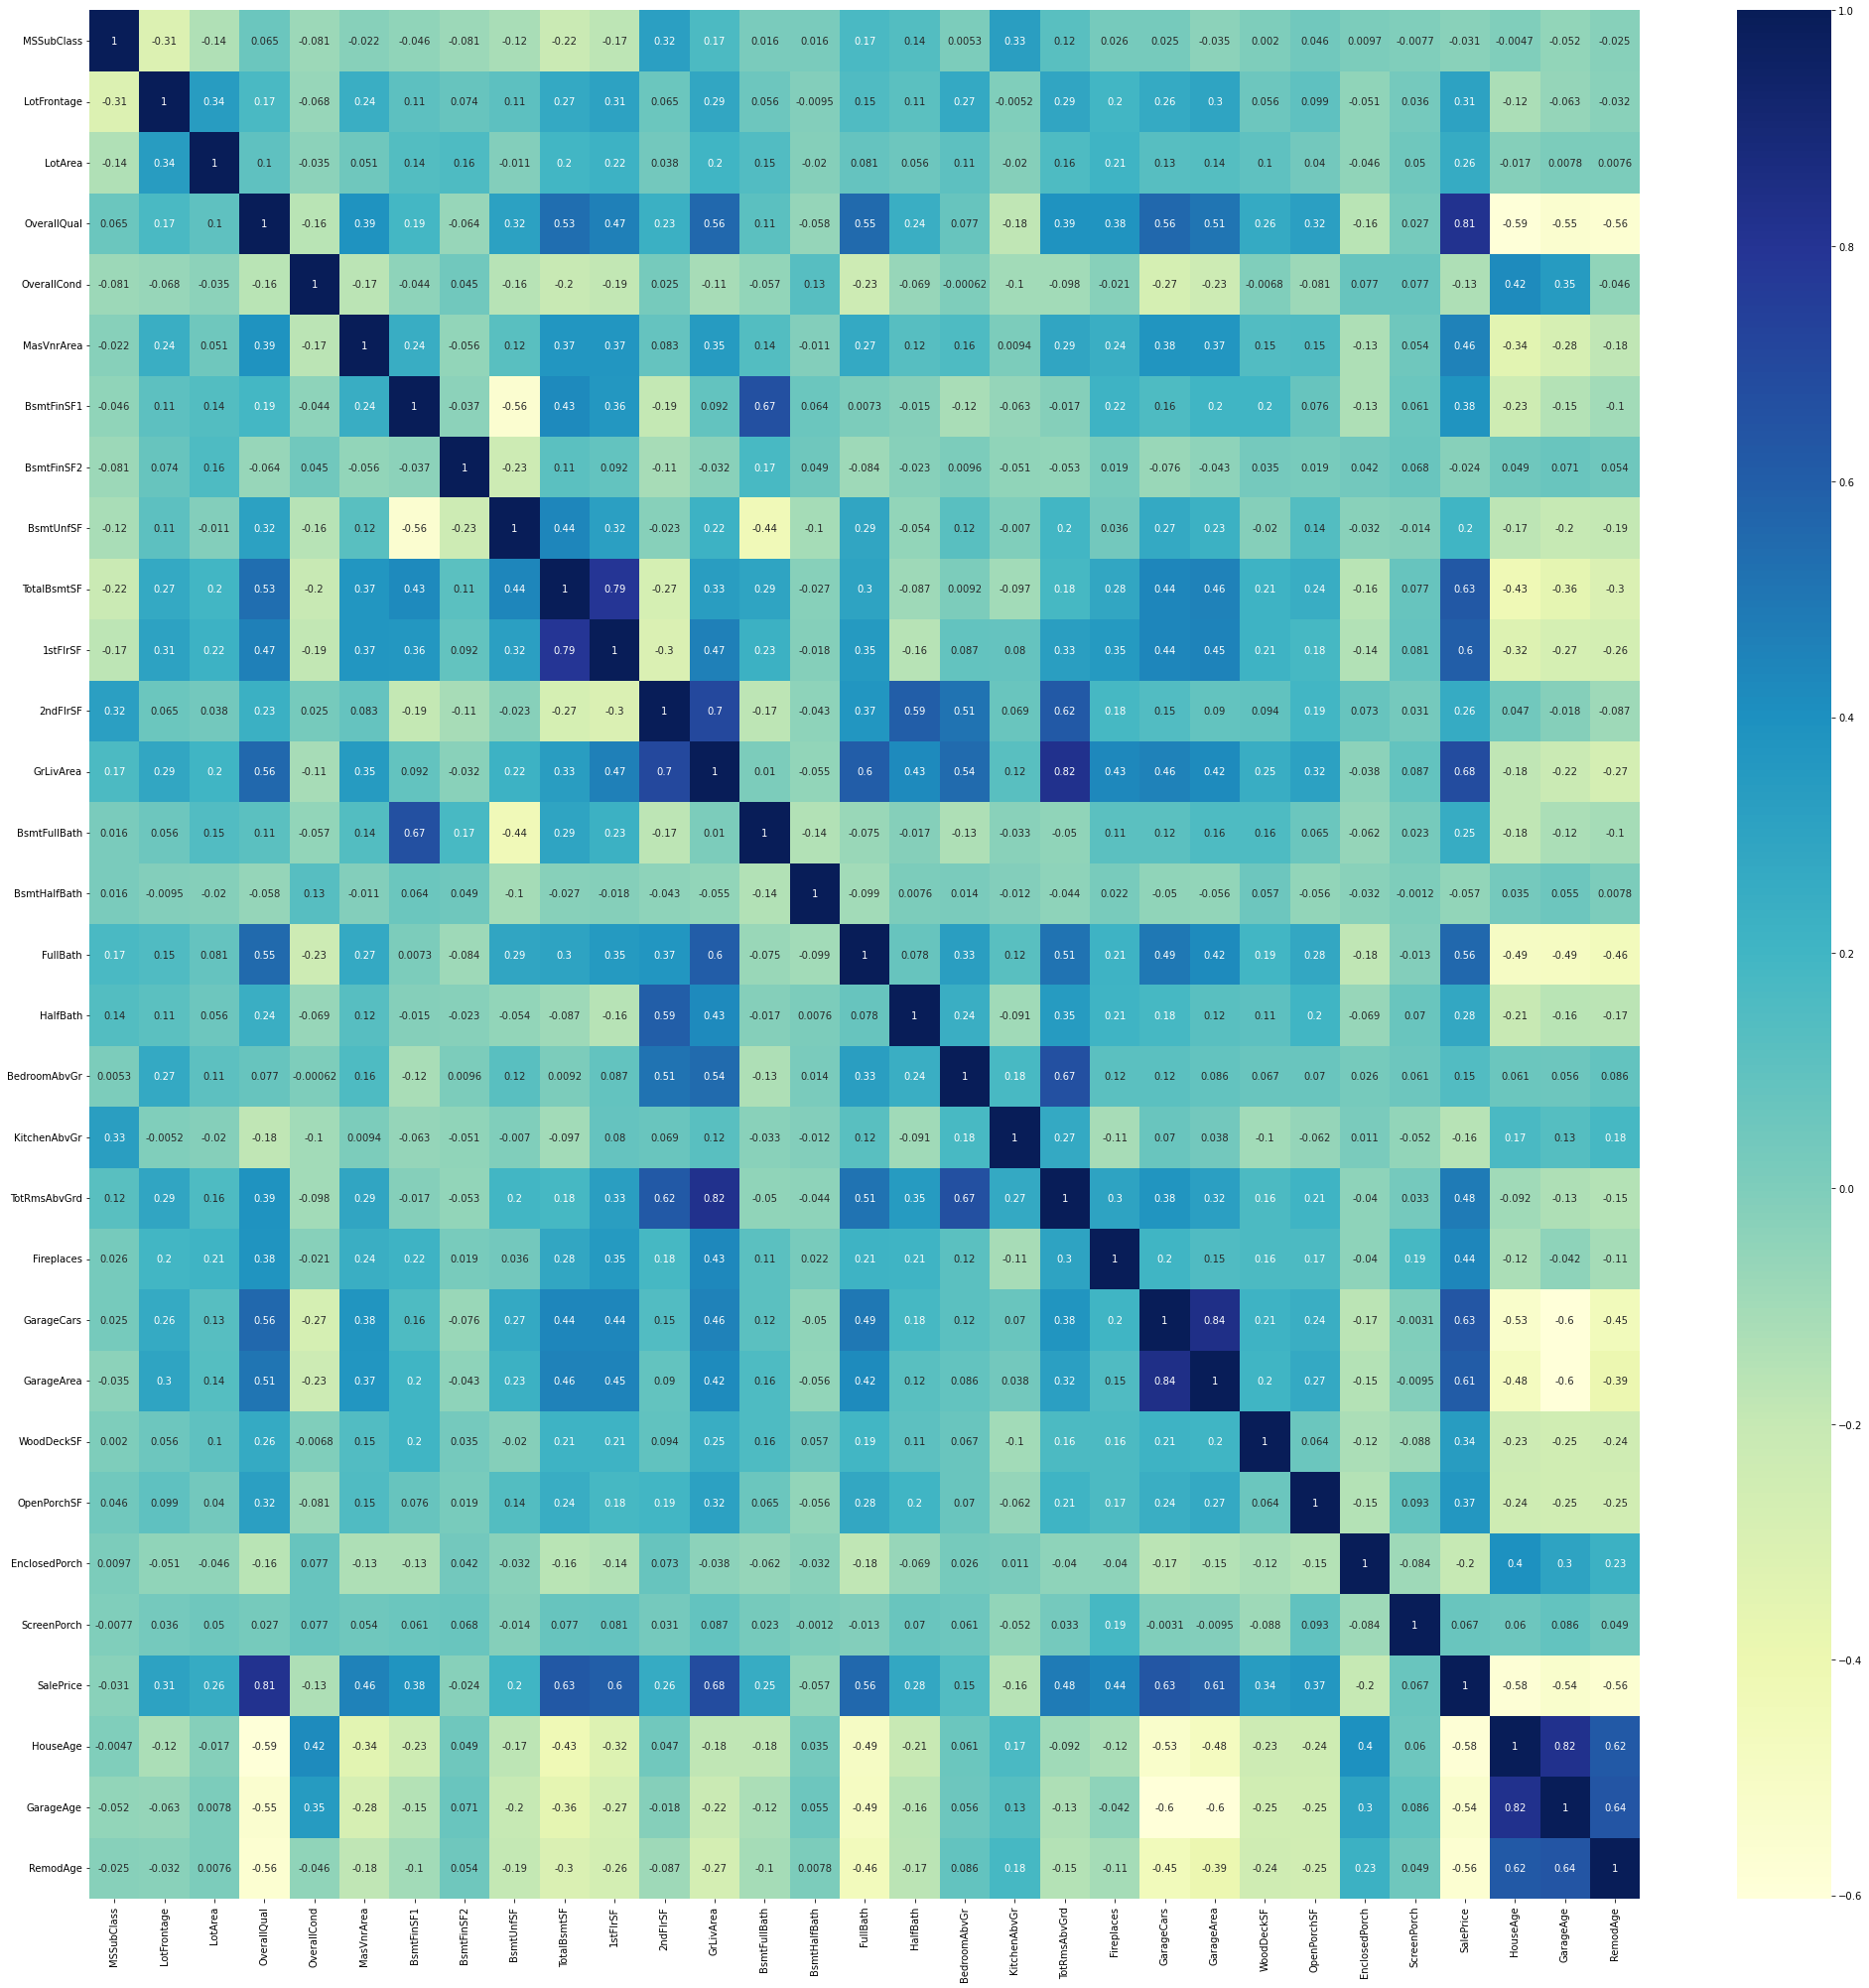

In [31]:
# Lets now check the correlation accross the variables

plt.figure(figsize = (35, 35))
sns.heatmap(HousePrice.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [32]:
# Filtering out correlations greater than 50%

df = HousePrice.corr()

def filtcorr(df,begin,end):
    df1 = pd.DataFrame(index=df.index,columns=df.columns)
    for i in df.index:
        for j in df.columns:
            if(df[i][j] >= begin and df[i][j] < end ):
                if(i!=j):
                    df1[i][j] = df[i][j]
                    print(i,'vs',j)
            if(df[i][j] <= -begin and df[i][j] > -end):
                if(i!=j):
                    df1[i][j] = df[i][j]
                    print(i,'vs',j)
    return df1
              
df1 = filtcorr(df,0.5,1)
df1.dropna(axis = 0, how = 'all', inplace = True)
df1.fillna(0,inplace=True)

OverallQual vs TotalBsmtSF
OverallQual vs GrLivArea
OverallQual vs FullBath
OverallQual vs GarageCars
OverallQual vs GarageArea
OverallQual vs SalePrice
OverallQual vs HouseAge
OverallQual vs GarageAge
OverallQual vs RemodAge
BsmtFinSF1 vs BsmtUnfSF
BsmtFinSF1 vs BsmtFullBath
BsmtUnfSF vs BsmtFinSF1
TotalBsmtSF vs OverallQual
TotalBsmtSF vs 1stFlrSF
TotalBsmtSF vs SalePrice
1stFlrSF vs TotalBsmtSF
1stFlrSF vs SalePrice
2ndFlrSF vs GrLivArea
2ndFlrSF vs HalfBath
2ndFlrSF vs BedroomAbvGr
2ndFlrSF vs TotRmsAbvGrd
GrLivArea vs OverallQual
GrLivArea vs 2ndFlrSF
GrLivArea vs FullBath
GrLivArea vs BedroomAbvGr
GrLivArea vs TotRmsAbvGrd
GrLivArea vs SalePrice
BsmtFullBath vs BsmtFinSF1
FullBath vs OverallQual
FullBath vs GrLivArea
FullBath vs TotRmsAbvGrd
FullBath vs SalePrice
HalfBath vs 2ndFlrSF
BedroomAbvGr vs 2ndFlrSF
BedroomAbvGr vs GrLivArea
BedroomAbvGr vs TotRmsAbvGrd
TotRmsAbvGrd vs 2ndFlrSF
TotRmsAbvGrd vs GrLivArea
TotRmsAbvGrd vs FullBath
TotRmsAbvGrd vs BedroomAbvGr
GarageCars vs 

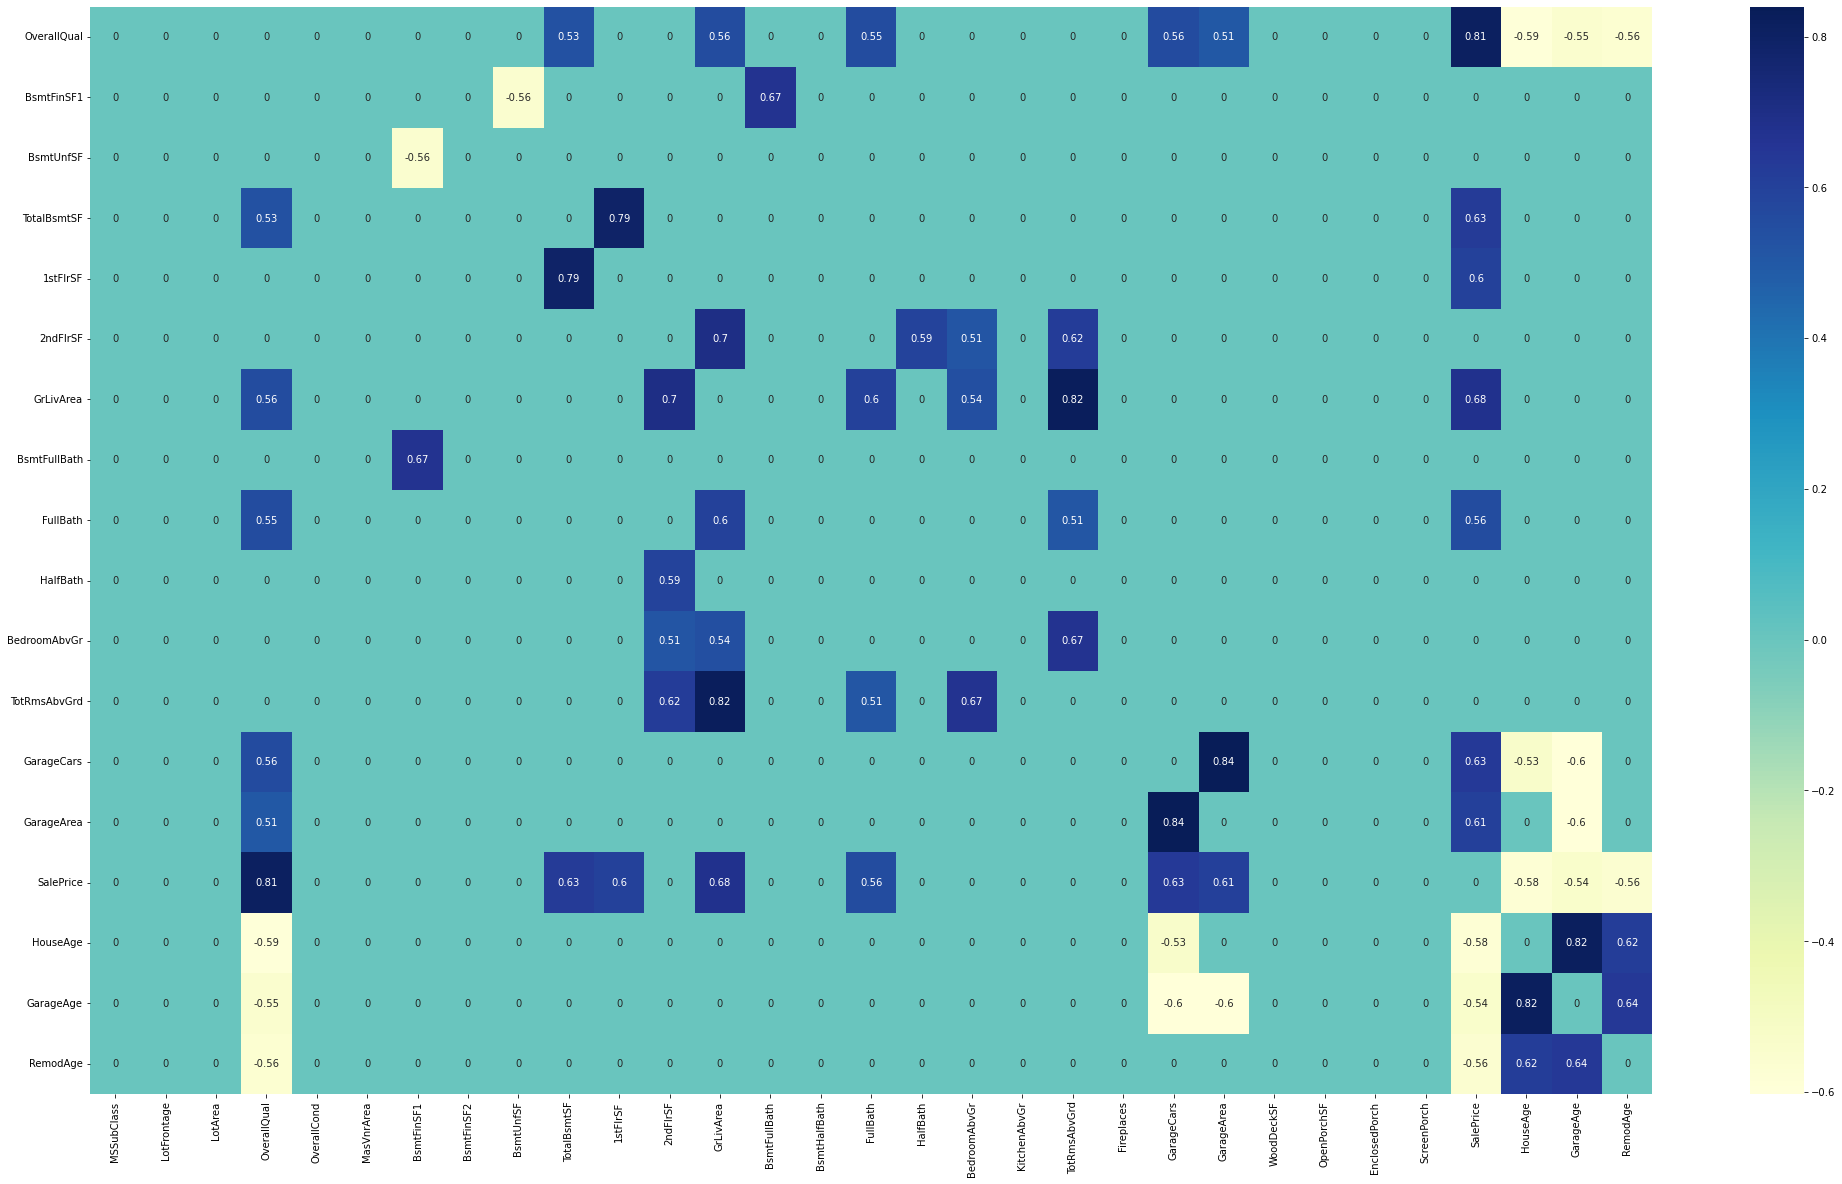

In [33]:
plt.figure(figsize = (35, 20))
sns.heatmap(df1, annot = True, cmap="YlGnBu")
plt.show()

- Greater than 60%
     - RemodAge vs GarageAge
     - BsmtFinSF1 vs BsmtFullBath
     - TotalBsmtSF vs SalePrice
     - 1stFlrSF vs SalePrice
     - 2ndFlrSF vs TotRmsAbvGrd
     - GrLivArea vs FullBath
     - FullBath vs GrLivArea
     - BedroomAbvGr vs TotRmsAbvGrd
     - GarageAge vs GarageArea
     - GarageCars vs SalePrice
     - GarageArea vs SalePrice

    
- Greater than 70%
     - GrLiveArea vs 2ndFlrSF
     
 
- Greater than 80%
     - OverallQual vs SalePrice
     - HouseAge vs GarageAge
     - TotalBsmtSF vs 1stFlrSF
     - GrLivArea vs  TotRmsAbvGrd
     - GarageArea vs GarageCars
     
     
- By looking at these correlation the following variables can be dropped due to high correlation
    - GarageAge (Will be mostly same as HouseAge)
    - GarageCars (Can be represented by GarageArea)


In [34]:
HousePrice.drop(['GarageAge','GarageCars'],axis=1,inplace=True)

#### Visualizing Categorical Variables
- For visualizing the categorical variables we will be using box plots

In [35]:
# Reading all the categorical variables

CatCols = HousePrice.select_dtypes(include=['object']).columns

In [36]:
len(CatCols)

39

In [37]:
# Spliting the categorical variable into 2 sets to represent the plots in a more readable format

#Since split cannot be done on odd numbers first we will pop one variable and then perform split and add the 
#popped variable back to one of the set.

indices = np.where(CatCols=='MoSold')
CatCols = np.delete(CatCols, indices)

CatColsSplit = np.split(CatCols,2)
CatColsSplit[0] = np.append(CatColsSplit[0],'MoSold')
CatColsSplit

[array(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
        'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
        'ExterCond', 'MoSold'], dtype=object),
 Index(['Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
        'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
        'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
        'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
       dtype='object')]

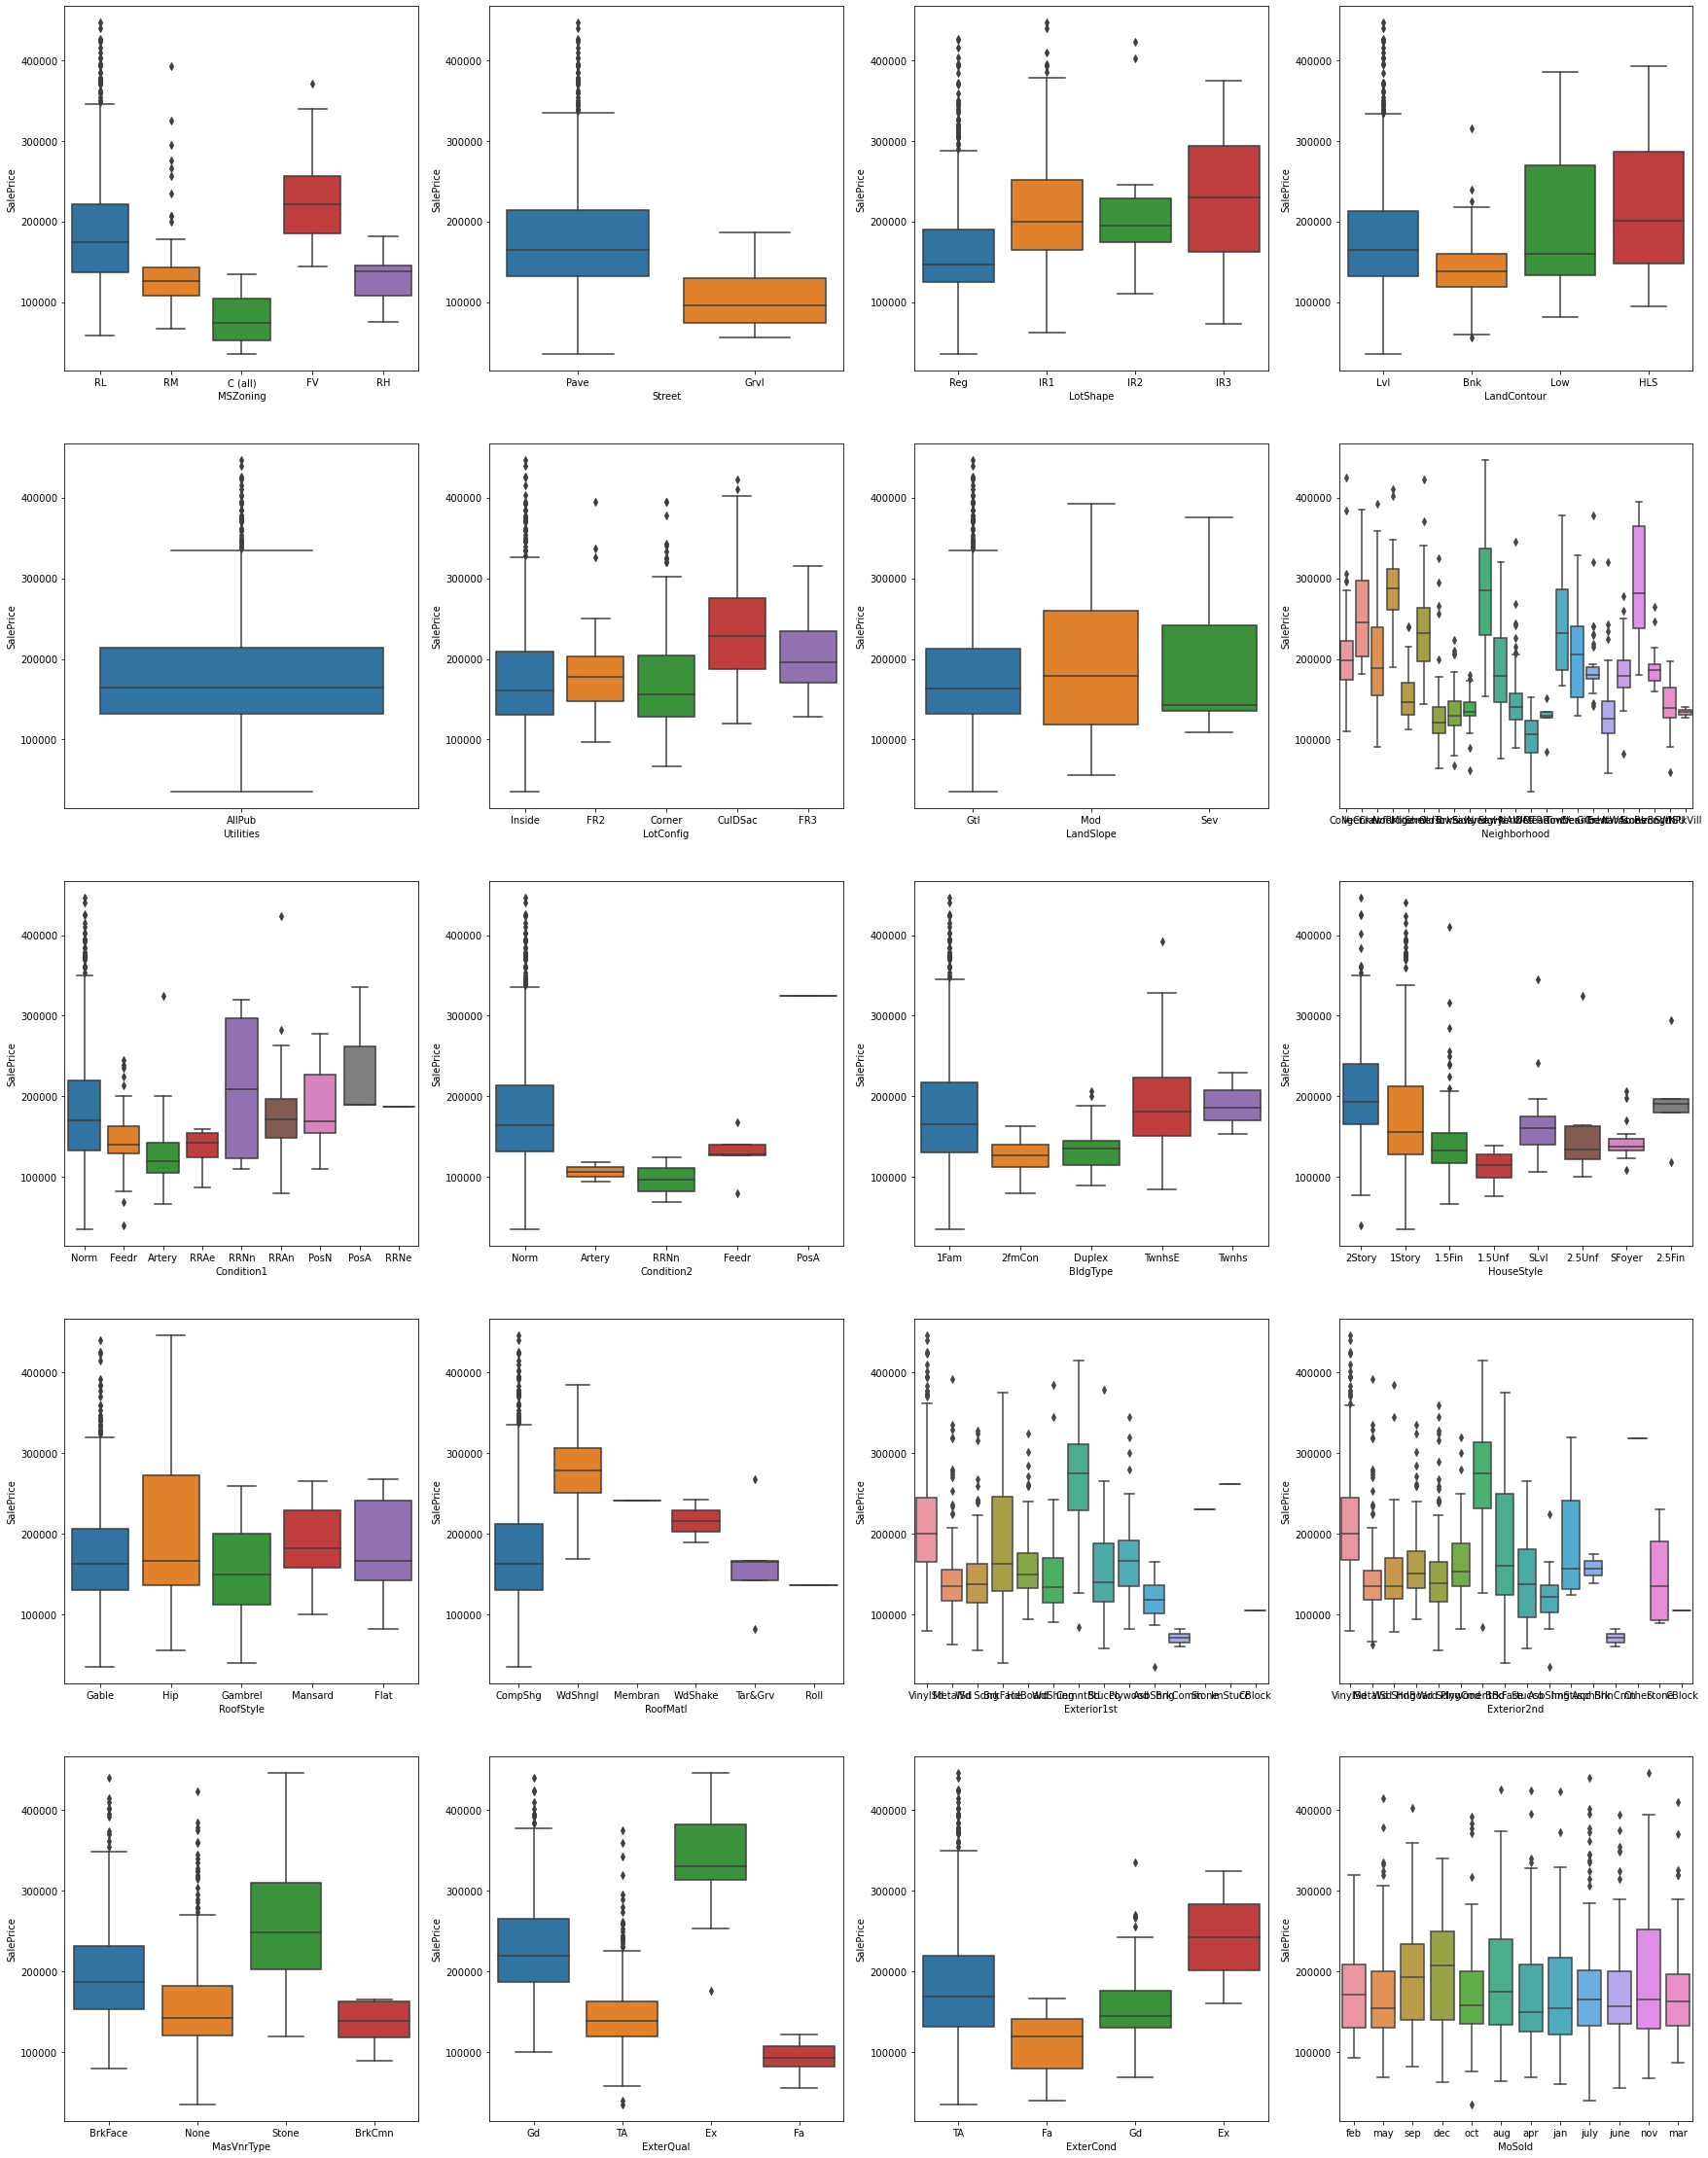

In [38]:
fig, axs = plt.subplots(5,4,figsize=(30,40))
j = 0
k = -1
for i in CatColsSplit[0]:
    if(i != 'SalePrice'):
        if(k>2):
            j=j+1
            k=0
        else:
            k=k+1
        sns.boxplot(data=HousePrice,x = i, y = 'SalePrice',ax=axs[j][k])

fig.show()

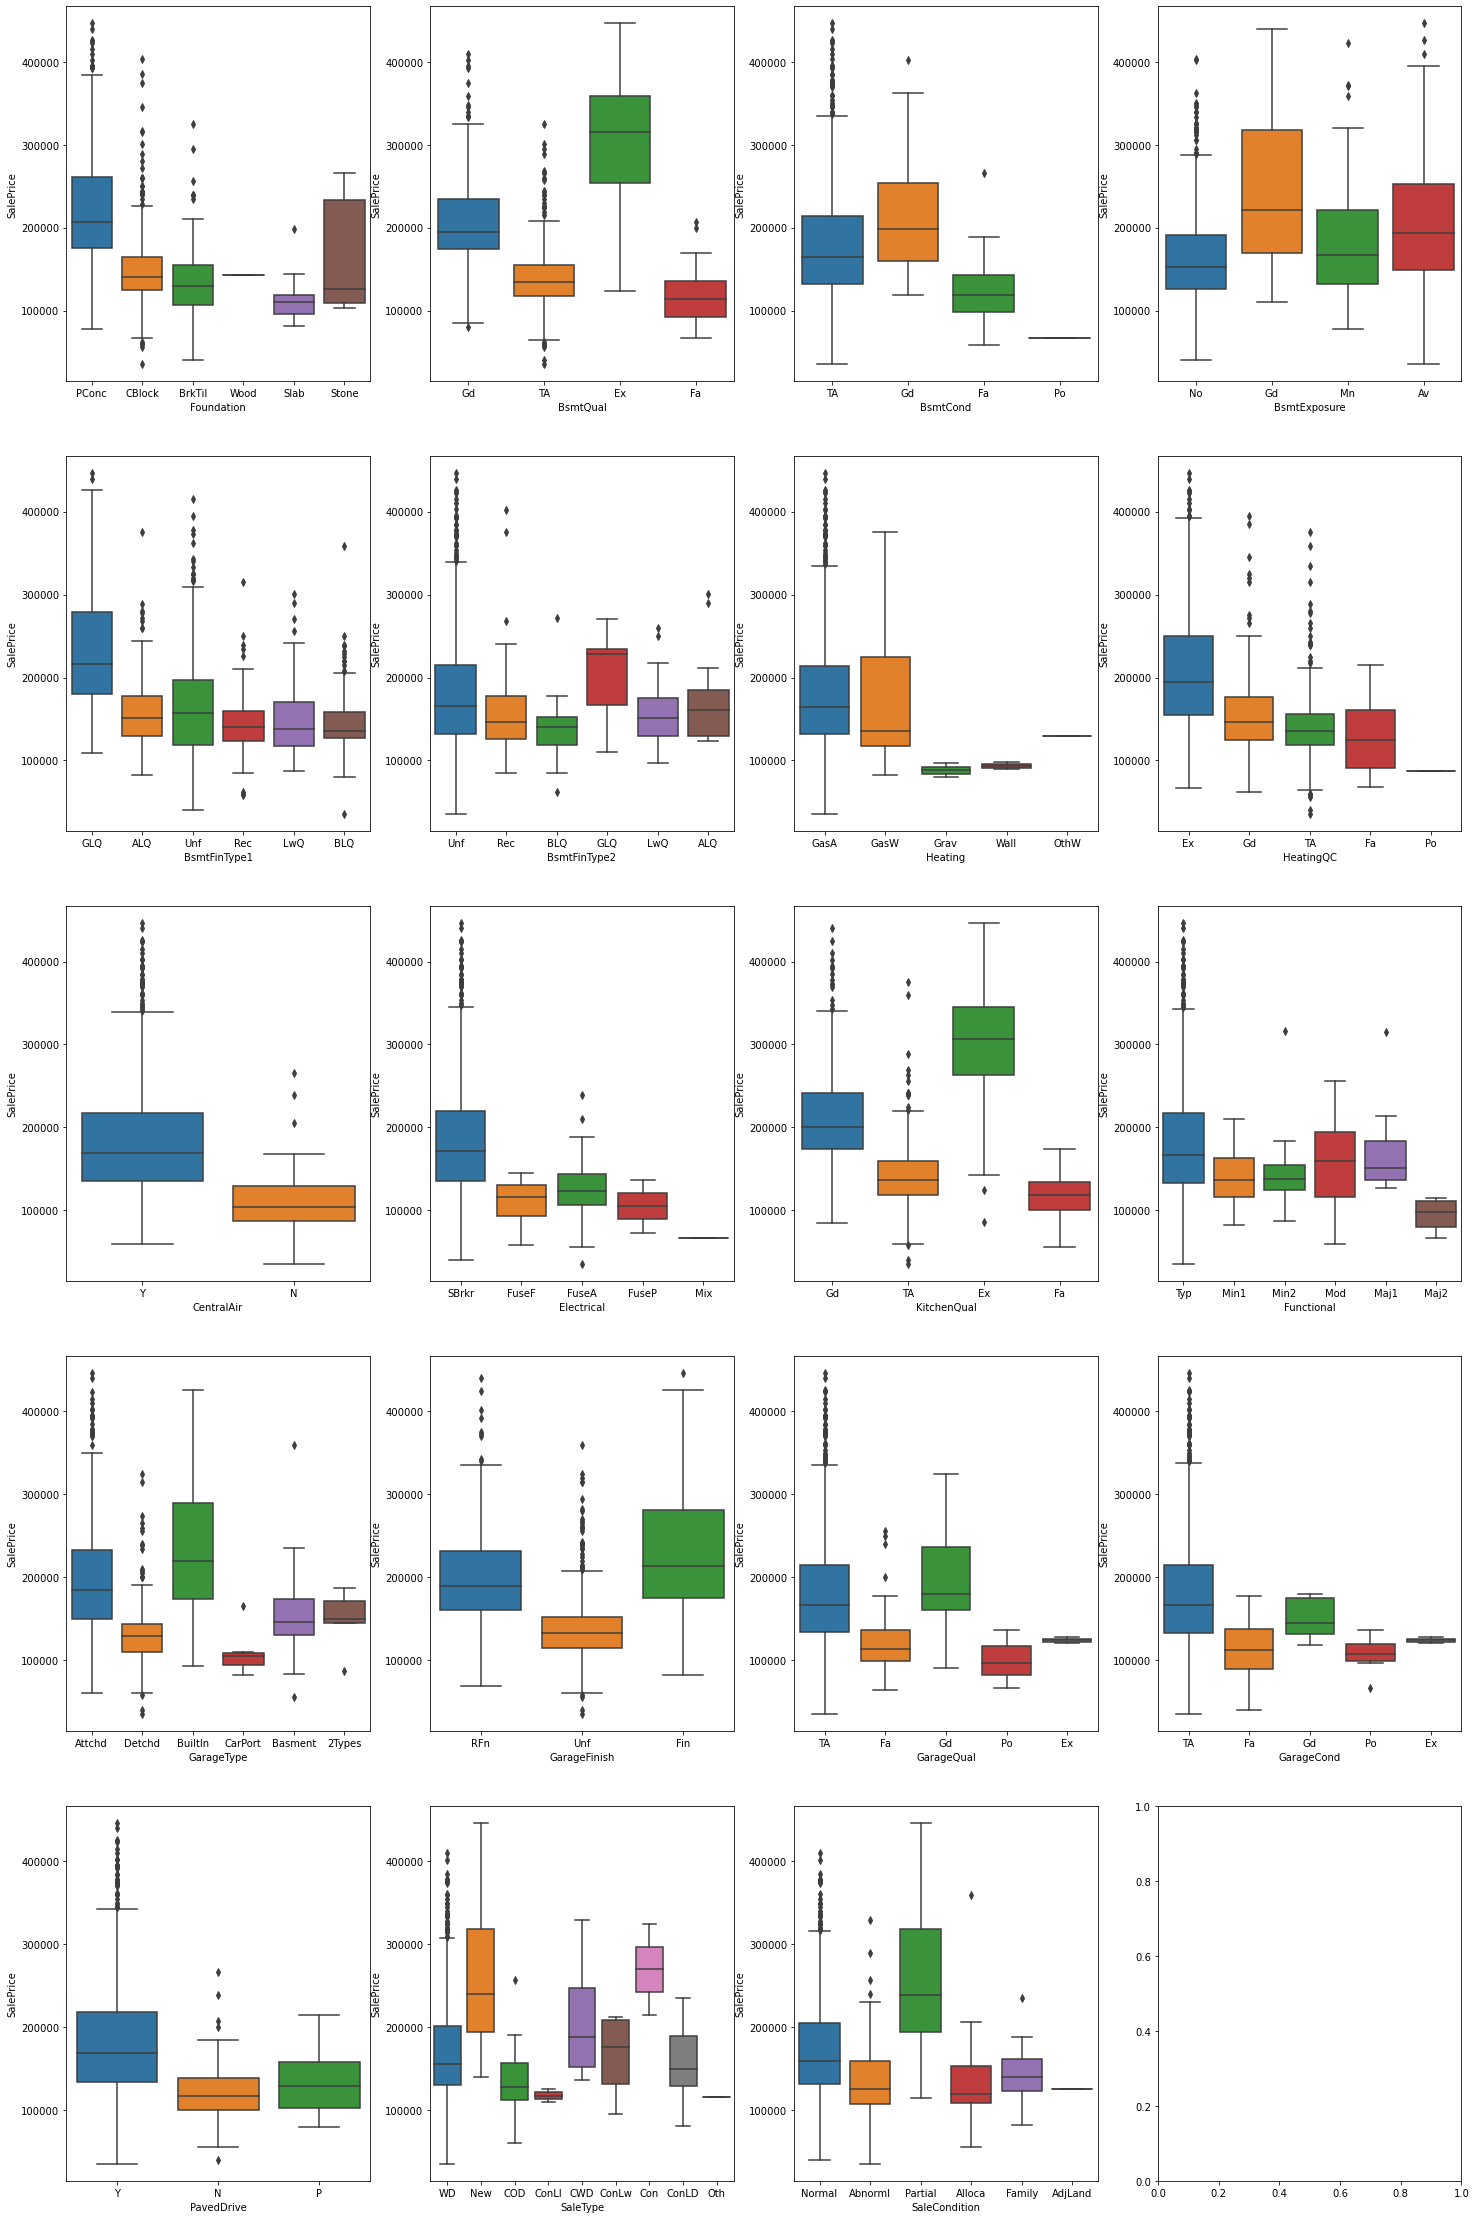

In [39]:
fig, axs = plt.subplots(5,4,figsize=(25,40))
j = 0
k = -1
for i in CatColsSplit[1]:
    if(i != 'SalePrice'):
        if(k>2):
            j=j+1
            k=0
        else:
            k=k+1
        sns.boxplot(data=HousePrice,x = i, y = 'SalePrice',ax=axs[j][k])

fig.show()

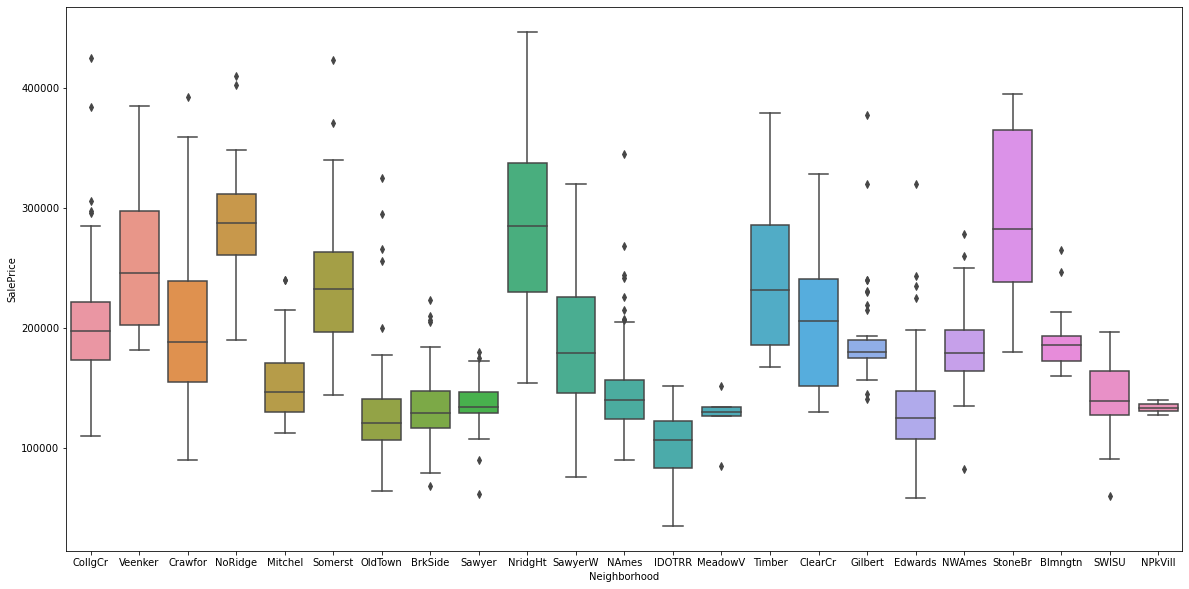

In [40]:
# Enlarged Box plots for Neighborhood, Exterior1st and Exterior2nd as its not clear in the previous plot

fig = plt.figure(figsize=(20,10))
sns.boxplot(data=HousePrice,x = 'Neighborhood', y = 'SalePrice')
fig.show()

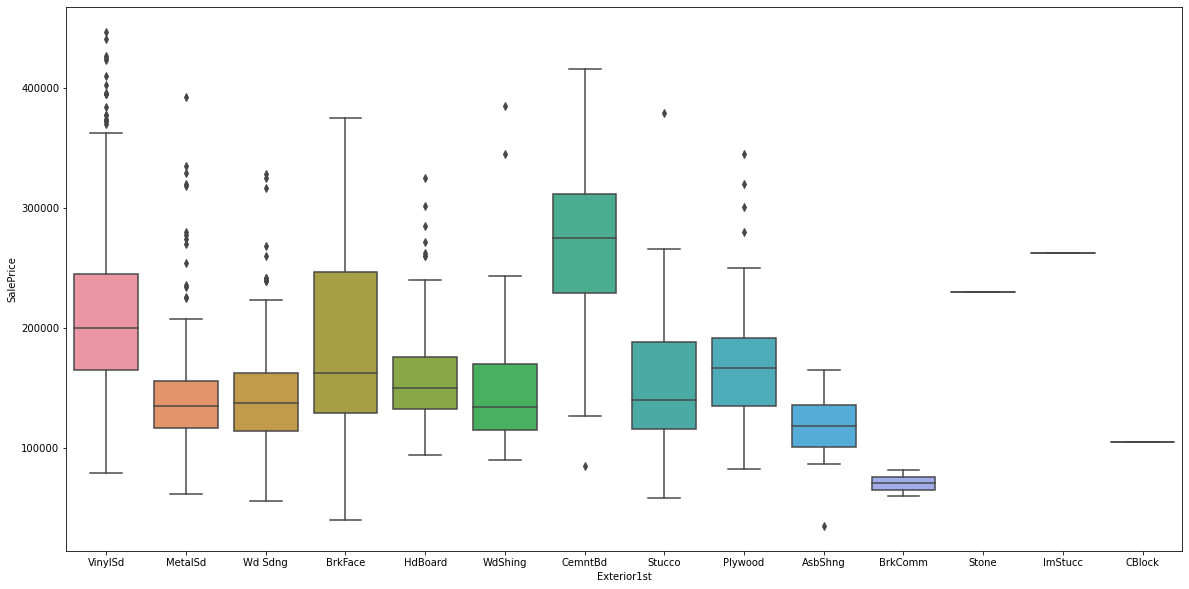

In [41]:
fig = plt.figure(figsize=(20,10))
sns.boxplot(data=HousePrice,x = 'Exterior1st', y = 'SalePrice')
fig.show()

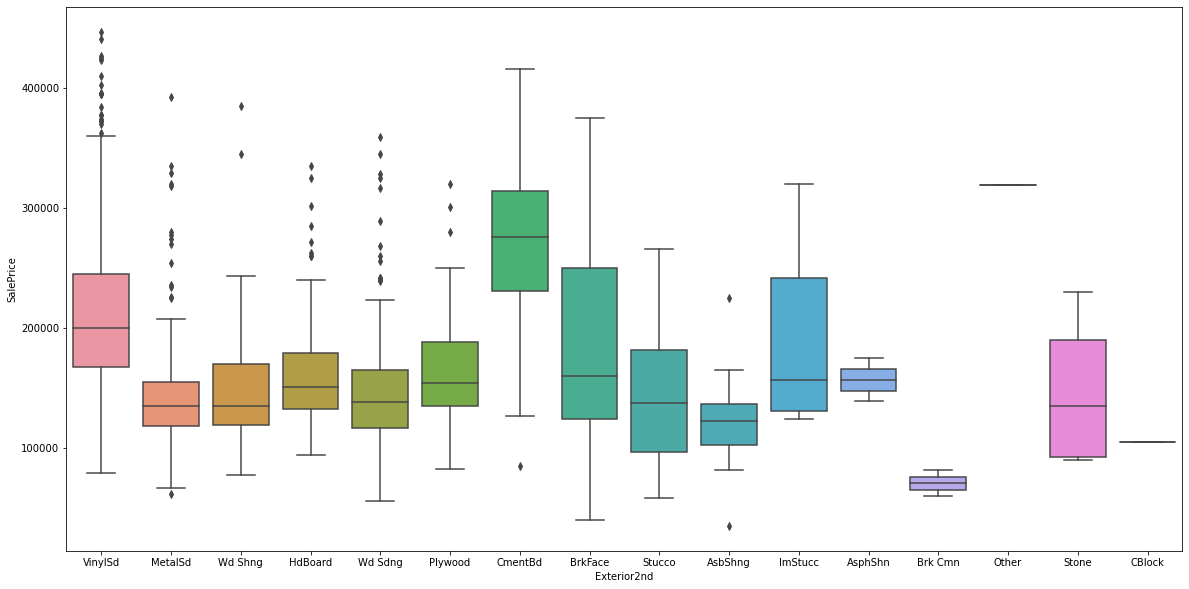

In [42]:
fig = plt.figure(figsize=(20,10))
sns.boxplot(data=HousePrice,x = 'Exterior2nd', y = 'SalePrice')
fig.show()

### Observations

- By looking at all the graphs for the categorical variables we could see that the saleprice varies significantly with these categorical variables.
- For the categorical variable 'Utilities' only one value is available hence we could drop that column.

In [43]:
# The column utilities have only one value in the dataset hence can be dropped

HousePrice.drop(['Utilities'],axis=1,inplace=True)

In [44]:
HousePrice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038 entries, 0 to 1459
Data columns (total 67 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1038 non-null   int64  
 1   MSZoning       1038 non-null   object 
 2   LotFrontage    1038 non-null   float64
 3   LotArea        1038 non-null   int64  
 4   Street         1038 non-null   object 
 5   LotShape       1038 non-null   object 
 6   LandContour    1038 non-null   object 
 7   LotConfig      1038 non-null   object 
 8   LandSlope      1038 non-null   object 
 9   Neighborhood   1038 non-null   object 
 10  Condition1     1038 non-null   object 
 11  Condition2     1038 non-null   object 
 12  BldgType       1038 non-null   object 
 13  HouseStyle     1038 non-null   object 
 14  OverallQual    1038 non-null   int64  
 15  OverallCond    1038 non-null   int64  
 16  RoofStyle      1038 non-null   object 
 17  RoofMatl       1038 non-null   object 
 18  Exterior

## 3. Data Preparation<a class="anchor" id="DataPrep"></a>

In [45]:
HousePrice.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,SaleType,SaleCondition,SalePrice,HouseAge,RemodAge
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,0,61,0,0,feb,WD,Normal,208500,5,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,298,0,0,0,may,WD,Normal,181500,31,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,0,42,0,0,sep,WD,Normal,223500,7,6
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,0,35,272,0,feb,WD,Abnorml,140000,91,36
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,192,84,0,0,dec,WD,Normal,250000,8,8


In [46]:
# Creation of dummy variables for categorical columns

#Will split the categorical columns into 2, CatCols1 where we will drop a specific value after 
#creating dummies based on no of entries another CatCols2 with dropfirst
CatCols = HousePrice.select_dtypes(include=['object']).columns

CatCols1 = ['Condition1','Condition2','RoofMatl','Foundation','BsmtCond','Heating','HeatingQC','Electrical','SaleType','SaleCondition','Exterior1st','Exterior2nd']
CatCols2 = CatCols.drop(CatCols1)

print('Shape', HousePrice.shape)
print('Length',len(CatCols1))
FinalCol = HousePrice.shape[1]
for i in CatCols1:
    print('Column:',i, 'No of values', len(HousePrice[i].value_counts()))
    FinalCol = FinalCol + len(HousePrice[i].value_counts())-2
    dummies = pd.get_dummies(HousePrice[i],prefix=i,prefix_sep='_')
    dropCol = i+'_'+HousePrice[i].value_counts().index[-1]
    print('Dropped Column:',dropCol)
    dummies.drop(dropCol,axis=1,inplace=True)
    HousePrice = pd.concat([HousePrice,dummies],axis=1)
    print('Since the lowest occuring value is ',HousePrice[i].value_counts().index[-1],' with frequency',HousePrice[i].value_counts().values[-1],' its dropped')
HousePrice.drop(CatCols1,axis=1,inplace=True)
print('Shape', HousePrice.shape)
print('Final Columns',FinalCol)

Shape (1038, 67)
Length 12
Column: Condition1 No of values 9
Dropped Column: Condition1_RRNe
Since the lowest occuring value is  RRNe  with frequency 1  its dropped
Column: Condition2 No of values 5
Dropped Column: Condition2_PosA
Since the lowest occuring value is  PosA  with frequency 1  its dropped
Column: RoofMatl No of values 6
Dropped Column: RoofMatl_Roll
Since the lowest occuring value is  Roll  with frequency 1  its dropped
Column: Foundation No of values 6
Dropped Column: Foundation_Wood
Since the lowest occuring value is  Wood  with frequency 1  its dropped
Column: BsmtCond No of values 4
Dropped Column: BsmtCond_Po
Since the lowest occuring value is  Po  with frequency 1  its dropped
Column: Heating No of values 5
Dropped Column: Heating_OthW
Since the lowest occuring value is  OthW  with frequency 1  its dropped
Column: HeatingQC No of values 5
Dropped Column: HeatingQC_Po
Since the lowest occuring value is  Po  with frequency 1  its dropped
Column: Electrical No of values

In [47]:
FinalCol = HousePrice.shape[1]
for i in CatCols2:
    FinalCol = FinalCol + len(HousePrice[i].value_counts()) - 2
    dummies = pd.get_dummies(HousePrice[i],prefix=i,prefix_sep='_',drop_first=True)
    HousePrice = pd.concat([HousePrice,dummies],axis=1)

HousePrice.drop(CatCols2,axis=1,inplace=True)
print('Final Columns:',FinalCol)
print('Shape:',HousePrice.shape)

Final Columns: 223
Shape: (1038, 223)


In [48]:
HousePrice.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038 entries, 0 to 1459
Data columns (total 223 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    MSSubClass             int64  
 1    LotFrontage            float64
 2    LotArea                int64  
 3    OverallQual            int64  
 4    OverallCond            int64  
 5    MasVnrArea             float64
 6    BsmtFinSF1             int64  
 7    BsmtFinSF2             int64  
 8    BsmtUnfSF              int64  
 9    TotalBsmtSF            int64  
 10   1stFlrSF               int64  
 11   2ndFlrSF               int64  
 12   GrLivArea              int64  
 13   BsmtFullBath           int64  
 14   BsmtHalfBath           int64  
 15   FullBath               int64  
 16   HalfBath               int64  
 17   BedroomAbvGr           int64  
 18   KitchenAbvGr           int64  
 19   TotRmsAbvGrd           int64  
 20   Fireplaces             int64  
 21   GarageArea             int64  
 22 

## 4. Splitting the Data into Training and Testing Sets<a class="anchor" id="Split"></a>

In [49]:
#Using train_test_split from sklearn we split the data into train and test set in 7:3 ratio

from sklearn.model_selection import train_test_split

HousePrice_train,HousePrice_test = train_test_split(HousePrice, train_size = 0.7, random_state = 100)

In [50]:
print(HousePrice.shape)
print(HousePrice_train.shape)
print(HousePrice_test.shape)

(1038, 223)
(726, 223)
(312, 223)


### Scaling the Features 

In [51]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import StandardScaler

cols = HousePrice_train.columns
scaler = StandardScaler()
HousePrice_train = pd.DataFrame(scaler.fit_transform(HousePrice_train))
HousePrice_train.columns = cols

cols = HousePrice_test.columns
HousePrice_test = pd.DataFrame(scaler.transform(HousePrice_test))
HousePrice_test.columns = cols

In [52]:
HousePrice_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,MoSold_dec,MoSold_feb,MoSold_jan,MoSold_july,MoSold_june,MoSold_mar,MoSold_may,MoSold_nov,MoSold_oct,MoSold_sep
count,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02,...,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02
mean,4.404191e-17,1.082697e-16,5.459361e-17,-2.257148e-16,1.729562e-16,-1.327374e-16,-5.872254e-17,-4.206919e-16,-1.272322e-16,-2.162335e-16,...,-2.299966e-16,-6.474007e-16,-1.072757e-16,-5.520530e-17,2.293849e-18,-2.002530e-16,-1.718858e-16,-1.485650e-16,7.401487e-17,2.973593e-16
std,1.000689e+00,1.000689e+00,1.000689e+00,1.000689e+00,1.000689e+00,1.000689e+00,1.000689e+00,1.000689e+00,1.000689e+00,1.000689e+00,...,1.000689e+00,1.000689e+00,1.000689e+00,1.000689e+00,1.000689e+00,1.000689e+00,1.000689e+00,1.000689e+00,1.000689e+00,1.000689e+00
min,-8.609780e-01,-2.202986e+00,-1.824074e+00,-3.182015e+00,-3.364419e+00,-6.415575e-01,-1.014622e+00,-2.856620e-01,-1.354415e+00,-2.727444e+00,...,-1.888474e-01,-1.965365e-01,-2.111973e-01,-4.626519e-01,-4.626519e-01,-2.477973e-01,-3.761774e-01,-2.414726e-01,-2.719641e-01,-2.216595e-01
25%,-8.609780e-01,-5.750202e-01,-4.874933e-01,-8.469650e-01,-5.568694e-01,-6.415575e-01,-1.014622e+00,-2.856620e-01,-7.523852e-01,-6.324845e-01,...,-1.888474e-01,-1.965365e-01,-2.111973e-01,-4.626519e-01,-4.626519e-01,-2.477973e-01,-3.761774e-01,-2.414726e-01,-2.719641e-01,-2.216595e-01
50%,-5.616680e-02,-3.236497e-02,-1.093082e-01,-6.861489e-02,-5.568694e-01,-6.415575e-01,-9.721612e-02,-2.856620e-01,-1.935200e-01,-1.446876e-01,...,-1.888474e-01,-1.965365e-01,-2.111973e-01,-4.626519e-01,-4.626519e-01,-2.477973e-01,-3.761774e-01,-2.414726e-01,-2.719641e-01,-2.216595e-01
75%,2.121036e-01,5.102902e-01,3.048032e-01,7.097352e-01,3.789805e-01,4.746972e-01,6.446439e-01,-2.856620e-01,5.380027e-01,5.484974e-01,...,-1.888474e-01,-1.965365e-01,-2.111973e-01,-4.626519e-01,-4.626519e-01,-2.477973e-01,-3.761774e-01,-2.414726e-01,-2.719641e-01,-2.216595e-01
max,3.699619e+00,3.983283e+00,8.791213e+00,3.044786e+00,3.186530e+00,3.815763e+00,3.123923e+00,6.990408e+00,3.464094e+00,5.503487e+00,...,5.295281e+00,5.088113e+00,4.734908e+00,2.161452e+00,2.161452e+00,4.035556e+00,2.658320e+00,4.141256e+00,3.676955e+00,4.511423e+00


In [53]:
HousePrice_test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,MoSold_dec,MoSold_feb,MoSold_jan,MoSold_july,MoSold_june,MoSold_mar,MoSold_may,MoSold_nov,MoSold_oct,MoSold_sep
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,...,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,0.033257,0.019639,0.179198,0.108510,-0.040952,-0.054512,-0.014006,0.037787,0.004623,0.005297,...,0.092390,0.040595,-0.068521,-0.084175,-0.042122,0.095420,0.110120,-0.030765,-0.031485,-0.039618
std,1.054848,1.093431,3.064702,1.074644,1.036074,0.992244,1.045788,1.126650,1.032436,1.037928,...,1.211591,1.095799,0.829179,0.923391,0.964182,1.164763,1.114975,0.939098,0.945870,0.911670
min,-0.860978,-2.094455,-1.746473,-3.182015,-3.364419,-0.641557,-1.014622,-0.285662,-1.354415,-2.727444,...,-0.188847,-0.196537,-0.211197,-0.462652,-0.462652,-0.247797,-0.376177,-0.241473,-0.271964,-0.221660
25%,-0.860978,-0.575020,-0.553718,-0.846965,-0.556869,-0.641557,-1.014622,-0.285662,-0.832467,-0.668427,...,-0.188847,-0.196537,-0.211197,-0.462652,-0.462652,-0.247797,-0.376177,-0.241473,-0.271964,-0.221660
50%,-0.056167,-0.032365,-0.092902,-0.068615,-0.556869,-0.641557,-0.201822,-0.285662,-0.146948,-0.122865,...,-0.188847,-0.196537,-0.211197,-0.462652,-0.462652,-0.247797,-0.376177,-0.241473,-0.271964,-0.221660
75%,0.480374,0.510290,0.374261,0.709735,0.378981,0.264918,0.673501,-0.285662,0.606157,0.769290,...,-0.188847,-0.196537,-0.211197,-0.462652,-0.462652,-0.247797,-0.376177,-0.241473,-0.271964,-0.221660
max,3.699619,4.308876,49.185880,3.044786,3.186530,3.623305,3.337944,9.230689,3.293708,2.756420,...,5.295281,5.088113,4.734908,2.161452,2.161452,4.035556,2.658320,4.141256,3.676955,4.511423


In [54]:
# Split into X_train and y_train
y_train = HousePrice_train.pop('SalePrice')
X_train = HousePrice_train

In [55]:
# Split into X_test and y_test
y_test = HousePrice_test.pop('SalePrice')
X_test = HousePrice_test

## 5. Model Building and Evaluation<a class="anchor" id="Build"></a>

In [56]:
from sklearn.metrics import r2_score, mean_squared_error

### Linear Regression<a class="anchor" id="LR"></a>

In [57]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [58]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

1.2510161021791536e-05
[ 9.48557994e-02 -7.16428804e-04  6.18074871e-02  1.50007615e-01
  8.77441733e-02  3.73830687e-02  4.14776649e+11  1.54492754e+11
  4.39045082e+11 -3.88504177e+11 -8.12339783e-02  4.19616699e-03
  4.87358093e-01  2.58560181e-02  1.24359131e-03  1.53942108e-02
  2.46505737e-02 -5.67321777e-02 -3.60107422e-02  9.99450684e-03
  1.35574341e-02  6.05621338e-02  3.51104736e-02  2.77709961e-03
 -4.42504883e-04  1.39999390e-02 -1.20403290e-01 -3.77960205e-02
 -4.03308868e-02 -4.07958031e-02 -1.94854736e-02 -1.44424438e-02
  4.30059433e-03 -4.28314209e-02 -6.73675537e-03 -6.18457794e-03
 -5.07685892e+09 -5.07685892e+09 -1.01326884e+10 -5.07685892e+09
  2.98309326e-03  4.07829285e-02  8.86535645e-03 -4.78172302e-03
 -1.21273994e-02  6.58054352e-02  1.59721375e-01  1.63593292e-01
  4.96902466e-02  1.84249878e-02 -3.58109941e+10 -4.06949055e+10
 -5.36483431e+10  7.64208712e+10  6.47685957e+10  3.22925179e+10
  3.56482115e+10 -9.74006653e-02 -3.75823975e-02 -8.28323364e-02
 -

In [59]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Train:',r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2_test:',r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS train:',rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS test:',rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE train:',mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE test:',mse_test_lr)
metric.append(mse_test_lr**0.5)

R2 Train: 0.9443535759761247
R2_test: -1.3757190261939967e+21
RSS train: 40.39930384133348
RSS test: 5.2635678355010104e+23
MSE train: 0.05564642402387531
MSE test: 1.6870409729169904e+21


### Linear Regression using RFE<a class="anchor" id="LRRFE"></a>

#### RFE with 100 features

In [60]:
from sklearn.feature_selection import RFE

# Instantiate
lmRfe = LinearRegression()

# Fit a line
lmRfe.fit(X_train, y_train)

rfe = RFE(lmRfe,n_features_to_select=100)
rfe = rfe.fit(X_train,y_train)

In [61]:
# Significant features based on RFE
print(len(X_train.columns[rfe.support_]))

100


In [62]:
# creating a new X train with rfe filtered features

X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_test_rfe = X_test[X_test.columns[rfe.support_]]

In [63]:
# Instantiate
lmRfe = LinearRegression()

# Fit a line
lmRfe.fit(X_train_rfe, y_train)

LinearRegression()

In [64]:
# Print the coefficients and intercept
print(lmRfe.intercept_)
print(lmRfe.coef_)

-0.00019123084200290454
[ 8.43548830e-02  7.05734786e-02  1.56302240e-01  8.29135433e-02
 -8.25768866e+11 -3.07575913e+11 -8.74084305e+11  7.73463632e+11
  4.15881442e-01 -5.92041016e-02 -3.53488922e-02  6.58645630e-02
 -1.45324707e-01 -6.14166260e-02 -1.20192779e+10 -1.20192779e+10
 -2.39887693e+10 -1.20192779e+10 -1.48531076e+11 -1.68787777e+11
 -2.22513960e+11  3.72960537e+11  3.16093364e+11 -9.03792460e+10
  1.73975720e+11  1.47563315e+12  8.24704949e+11  2.22414752e+11
  1.68819117e+12 -6.70166016e-02 -4.26635742e-02 -4.99877930e-02
 -9.91663806e+10  1.39120447e+12 -1.88576118e+11 -1.62008390e+11
 -3.55519036e+11 -3.76374335e+10 -3.83127424e+11 -2.42141664e+11
 -5.33985590e+10 -1.39558088e+11 -4.90841575e+11 -3.52649586e+11
 -1.18278963e+11  1.12287608e+11  3.76374335e+10 -1.39120447e+12
  1.23965364e+11  1.66099508e+11  3.40701043e+11  6.50999678e+10
  3.79445479e+11  6.47595492e+10  2.79424021e+11  6.50999678e+10
  1.34575945e+11  4.88567301e+11  3.51197724e+11  1.70080766e+11
 

In [65]:
y_pred_train = lmRfe.predict(X_train_rfe)
y_pred_test = lmRfe.predict(X_test_rfe)

r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Train:',r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2_test:',r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS train:',rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS test:',rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE train:',mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE test:',mse_test_lr)

R2 Train: 0.9302821906405985
R2_test: -1.6285738963985865e+23
RSS train: 50.61512959492549
RSS test: 6.231002854220438e+25
MSE train: 0.0697178093594015
MSE test: 1.9971162994296277e+23


#### RFE with 50 features

In [66]:
# Instantiate
lmRfe = LinearRegression()

# Fit a line
lmRfe.fit(X_train, y_train)

rfe = RFE(lmRfe,n_features_to_select=50)
rfe = rfe.fit(X_train,y_train)

In [67]:
# Significant features based on RFE
print(len(X_train.columns[rfe.support_]))

50


In [68]:
# creating a new X train with rfe filtered features

X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_test_rfe = X_test[X_test.columns[rfe.support_]]

In [69]:
# Instantiate
lmRfe = LinearRegression()

# Fit a line
lmRfe.fit(X_train_rfe, y_train)

LinearRegression()

In [70]:
# Print the coefficients and intercept
print(lmRfe.intercept_)
print(lmRfe.coef_)

-0.0030091192463244693
[-1.62635480e+13 -6.05771885e+12 -1.72151223e+13  1.52333945e+13
 -6.86355877e+12 -7.79961244e+12 -1.02822768e+13  1.12768698e+13
  9.55742861e+12  5.08137749e+11  5.26034620e+12  2.64487989e+13
  1.47817602e+13  3.98649425e+12  3.02586242e+13 -1.21826172e-01
  1.70322144e+13 -1.03515625e-01 -3.35998535e-01 -3.00781250e-01
 -1.97265625e-01 -2.01171875e-01 -8.97709968e+12 -1.42578125e-01
 -3.40698242e-01 -3.02246094e-01 -8.05664062e-02  1.69921875e-01
  5.29785156e-02 -1.70322144e+13  2.28515625e-01  6.52465820e-01
  5.04882812e-01  6.00585938e-02  4.21875000e-01  3.61586384e+12
  3.98437500e-01  1.32324219e-01  2.25585938e-01  9.51660156e-01
  5.76538086e-01  2.65136719e-01  2.48709312e+11  1.30788578e+11
  3.65005653e+12  2.90557538e+11 -2.24316158e+11 -9.90729161e+10
 -9.90729161e+10 -2.66392258e+11]


In [71]:
y_pred_train = lmRfe.predict(X_train_rfe)
y_pred_test = lmRfe.predict(X_test_rfe)

r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Train:',r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2_test:',r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS train:',rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS test:',rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE train:',mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE test:',mse_test_lr)

R2 Train: 0.5396134304391238
R2_test: -4.220490401468648e+25
RSS train: 334.24064950119623
RSS test: 1.6147801334600794e+28
MSE train: 0.46038656956087637
MSE test: 5.175577350833588e+25


- Here the linear regression with and without feature elimination doesn't perform well with test data as it has very low accuracy.

- Lets now try Ridge and Lasso Regression

## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression<a class="anchor" id="RIDGE"></a>

In [72]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [73]:
print(model_cv.best_params_)
alpha_ridge = model_cv.best_params_['alpha']

{'alpha': 100}


In [74]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = alpha_ridge
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.80693679e-02  1.41624631e-02  5.33035185e-02  1.41675988e-01
  6.45666101e-02  4.11152278e-02  9.14055080e-02 -4.53617739e-03
 -8.15274363e-03  8.65695758e-02  1.05863963e-01  7.92826332e-02
  1.53553905e-01  3.20904929e-02 -6.27370922e-03  3.83440450e-02
  3.92116503e-02 -2.27848343e-02 -4.33913336e-02  3.92547586e-02
  3.15247376e-02  6.65824624e-02  3.76213340e-02  1.47243907e-02
 -5.07136213e-03  7.43769288e-03 -4.83484526e-02 -4.50863848e-02
 -1.66182321e-02 -1.03741341e-02  1.92670178e-02 -8.86885000e-03
  8.96849136e-03 -2.23215089e-02  5.19801468e-03 -9.22605725e-04
 -8.84064587e-03 -1.94225176e-02 -2.58600693e-02 -7.78465927e-03
 -2.56650364e-03  2.71345265e-02  2.69196073e-03  2.54471682e-03
 -1.75677624e-02 -1.30820847e-02 -5.42341729e-03  1.58509302e-02
  1.30975398e-02 -6.41108600e-03 -1.14096513e-02  7.06270690e-03
  1.74477068e-03  4.01248304e-03 -9.49655895e-03 -2.06879847e-03
  9.84843725e-03  1.06406944e-02 -5.79648134e-03 -6.91134913e-03
 -6.83851240e-03 -4.43214

In [75]:
len(ridge.coef_)

222

In [76]:
#Metrics
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Train:',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2_test:',r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS train:',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS test:',rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE train:',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE test:',mse_test_lr)
metric2.append(mse_test_lr**0.5)

R2 Train: 0.9354498473230527
R2_test: 0.9103160773829793
RSS train: 46.863410843463754
RSS test: 34.31350453547807
MSE train: 0.06455015267694732
MSE test: 0.10997918120345535


### Residual Analysis and Model Evaluation 

#### Ridge Regression

**Now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.**

Text(0.5, 0, 'Errors')

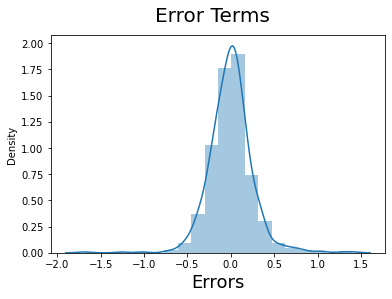

In [77]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

**Error term/ residual should be independent**

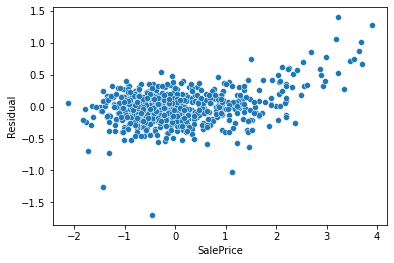

In [78]:
res = y_train - y_pred_train
sns.scatterplot(y_train,res)
plt.ylabel('Residual')
plt.show()

Text(0, 0.5, 'y_pred_test')

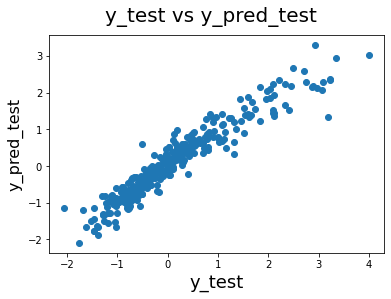

In [79]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred_test', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_test', fontsize = 16)    

#### Doubling the alpha value

In [80]:
#Fitting Ridge model for alpha = 200 and printing coefficients which have been penalised

alpha = alpha_ridge*2
ridge2 = Ridge(alpha=alpha)

ridge2.fit(X_train, y_train)
print(ridge2.coef_)

[-2.52723938e-02  1.95322099e-02  4.99443171e-02  1.27311262e-01
  5.38852723e-02  4.00050792e-02  8.35999869e-02 -4.39288165e-03
 -4.63560241e-03  8.22678816e-02  9.72847442e-02  6.10389240e-02
  1.29419322e-01  3.31138679e-02 -7.08679480e-03  3.84740544e-02
  3.80186706e-02 -1.24843912e-02 -3.78915003e-02  4.58098741e-02
  3.92284455e-02  6.56811721e-02  3.69685625e-02  1.99362569e-02
 -6.45408349e-03  7.27400733e-03 -3.70904146e-02 -4.44957997e-02
 -1.48015793e-02 -1.01070884e-02  1.89679745e-02 -7.61169357e-03
  6.43873573e-03 -1.84359940e-02  4.41060094e-03 -1.21676096e-03
 -8.54160157e-03 -1.40826077e-02 -1.93986374e-02 -4.32565739e-03
 -2.45680072e-03  2.04453065e-02  2.26795984e-03  3.80405663e-03
 -1.38355419e-02 -8.63733992e-03 -1.12227226e-02  1.76083936e-02
  9.13078113e-03 -7.05568278e-03 -1.20549781e-02  8.01829216e-03
  1.74431481e-03  3.20170005e-03 -7.57012718e-03 -8.98362673e-04
  7.40976896e-03  1.36448115e-02 -6.38119451e-03 -6.63244193e-03
 -8.76202056e-03 -3.29872

In [81]:
# Metrics
y_pred_train = ridge2.predict(X_train)
y_pred_test = ridge2.predict(X_test)


r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Train:',r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2_test:',r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS train:',rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS test:',rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE train:',mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE test:',mse_test_lr)


R2 Train: 0.9287291690842262
R2_test: 0.9054186708470979
RSS train: 51.742623244851785
RSS test: 36.187276070858616
MSE train: 0.07127083091577381
MSE test: 0.11598485920146992


In [82]:

ridgeBetas = pd.DataFrame(index=X_train.columns)
ridgeBetas.rows = X_train.columns
ridgeBetas['Ridge'] = ridge2.coef_
print(ridgeBetas.sort_values(by=['Ridge'],ascending=False).head(10))
print(ridgeBetas.sort_values(by=['Ridge']).head(10))

                         Ridge
GrLivArea             0.129419
OverallQual           0.127311
1stFlrSF              0.097285
BsmtFinSF1            0.083600
TotalBsmtSF           0.082268
Neighborhood_NridgHt  0.079735
GarageArea            0.065681
2ndFlrSF              0.061039
BsmtExposure_Gd       0.055920
OverallCond           0.053885
                         Ridge
BsmtQual_TA          -0.052169
ExterQual_TA         -0.046381
RemodAge             -0.044496
BsmtQual_Gd          -0.042099
KitchenQual_TA       -0.038372
KitchenAbvGr         -0.037892
HouseAge             -0.037090
BldgType_Twnhs       -0.036617
Neighborhood_MeadowV -0.036107
KitchenQual_Gd       -0.028930


## Lasso Regression<a class="anchor" id="LASSO"></a>

In [83]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [84]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)
alpha_lasso = model_cv.best_params_['alpha']

{'alpha': 0.01}


In [85]:
#Fitting Ridge model for alpha = 0.01 and printing coefficients which have been penalised

alpha =alpha_lasso

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

print(lasso.coef_)

[-4.47250882e-02  0.00000000e+00  6.15274387e-02  2.07533478e-01
  6.81969195e-02  7.54982174e-03  1.14922151e-01  0.00000000e+00
 -0.00000000e+00  5.26839074e-02  3.64389606e-02  0.00000000e+00
  3.40264666e-01  2.33006604e-02 -0.00000000e+00  0.00000000e+00
  8.88949466e-03 -2.37452669e-02 -4.78057885e-02  0.00000000e+00
  1.56944240e-02  7.02234030e-02  2.80093147e-02  1.06241695e-02
 -0.00000000e+00  4.03018010e-03 -8.91452750e-02 -4.71759699e-02
 -1.00917107e-02 -0.00000000e+00  1.94313745e-02 -0.00000000e+00
  0.00000000e+00 -1.10435673e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -5.85902079e-04 -3.99805947e-03  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.70790721e-03 -0.00000000e+00 -0.00000000e+00  1.26812003e-02
  4.04818116e-04 -0.00000000e+00 -1.50269862e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.18445467e-02 -0.00000000e+00
  6.77697555e-03  1.64240691e-02 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000

In [86]:
len(lasso.coef_)

222

In [87]:
#Metrics
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Train:',r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2_test:',r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS train:',rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS test:',rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE train:',mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE test:',mse_test_lr)
metric3.append(mse_test_lr**0.5)

R2 Train: 0.9258744327494841
R2_test: 0.9073876618757044
RSS train: 53.81516182387459
RSS test: 35.43393053668835
MSE train: 0.07412556725051596
MSE test: 0.11357029018169343


### Residual Analysis and Model Evaluation 

#### Lasso Regression

**Now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.**

Text(0.5, 0, 'Errors')

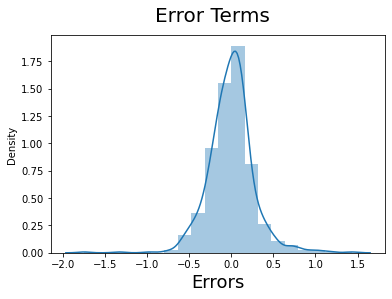

In [88]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

**Error term/ residual should be independent**

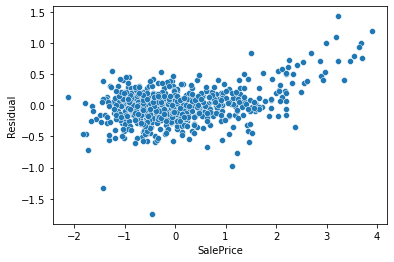

In [89]:
res = y_train - y_pred_train
sns.scatterplot(y_train,res)
plt.ylabel('Residual')
plt.show()

Text(0, 0.5, 'y_pred_test')

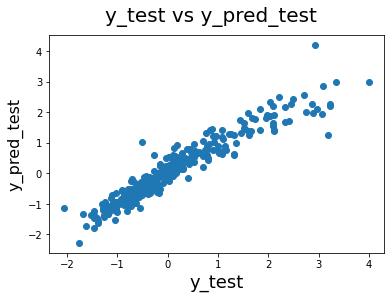

In [90]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred_test', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_test', fontsize = 16)    

#### Doubling the alpha value

In [91]:
#Fitting Ridge model for alpha = 0.02 and printing coefficients which have been penalised

alpha =alpha_lasso*2

lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(X_train, y_train) 

print(lasso2.coef_)

[-3.62390578e-02  0.00000000e+00  5.70538071e-02  2.39578044e-01
  4.57670447e-02  1.59869348e-04  1.27584234e-01  0.00000000e+00
 -0.00000000e+00  5.33157574e-02  2.78775684e-02  0.00000000e+00
  3.14409246e-01  1.42588455e-02 -0.00000000e+00  0.00000000e+00
  3.33170267e-03 -3.28138045e-03 -4.24095694e-02  0.00000000e+00
  1.73798544e-02  7.02925353e-02  1.91901611e-02  7.37299000e-03
 -0.00000000e+00  0.00000000e+00 -6.44563411e-02 -5.89614590e-02
 -3.33297539e-03 -0.00000000e+00  1.55245801e-02 -0.00000000e+00
  0.00000000e+00 -4.59328645e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  1.17987542e-02
  0.00000000e+00 -0.00000000e+00 -1.04767626e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -5.88340162e-03 -0.00000000e+00
  0.00000000e+00  1.83155721e-02  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000

In [92]:
y_pred_train = lasso2.predict(X_train)
y_pred_test = lasso2.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Train:',r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2_test:',r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS train:',rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS test:',rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE train:',mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE test:',mse_test_lr)

R2 Train: 0.9104611101619372
R2_test: 0.9003858383100153
RSS train: 65.00523402243363
RSS test: 38.11286225228543
MSE train: 0.08953888983806285
MSE test: 0.12215660978296612


In [93]:
lassoBetas = pd.DataFrame(index=X_train.columns)
lassoBetas.rows = X_train.columns
lassoBetas['Lasso'] = lasso2.coef_
print(lassoBetas.sort_values(by=['Lasso'],ascending=False).head(10))
print(lassoBetas.sort_values(by=['Lasso']).head(10))

                          Lasso
GrLivArea              0.314409
OverallQual            0.239578
BsmtFinSF1             0.127584
Neighborhood_NridgHt   0.100880
GarageArea             0.070293
BsmtExposure_Gd        0.066732
LotArea                0.057054
TotalBsmtSF            0.053316
SaleCondition_Partial  0.049733
Exterior2nd_CmentBd    0.048396
                          Lasso
HouseAge              -0.064456
RemodAge              -0.058961
KitchenAbvGr          -0.042410
ExterQual_TA          -0.040422
MSSubClass            -0.036239
BldgType_Twnhs        -0.029085
Neighborhood_MeadowV  -0.021107
SaleCondition_Abnorml -0.017022
BsmtQual_TA           -0.016522
SaleCondition_Family  -0.015244


## Observations<a class="anchor" id="OBS"></a>

### Compare all the Metric

In [94]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.443536e-01,0.935450,0.925874
1,R2 Score (Test),-1.375719e+21,0.910316,0.907388
2,RSS (Train),4.039930e+01,46.863411,53.815162
3,RSS (Test),5.263568e+23,34.313505,35.433931
4,RMSE (Train),2.358949e-01,0.254067,0.272260
5,RMSE (Test),4.107360e+10,0.331631,0.337002


- The R2 on train set for Linear regression is higher among all three but the R2 on test set for Linear Regression is very low showing a clear overfitting of the model.
- The RMSE for Linear regression is also very high on train set.
- In case of Ridge and Lasso the accuracy or the R2 is almost the same. And the difference b/w the train and test accuracy is also low.
- The RMSE is also low for Ridge and Lasso models on train set.

### Lets observe the changes in the coefficients after regularization

In [95]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns

betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [96]:
betas.sort_values(by=['Linear']).head(10)

,Linear,Ridge,Lasso
TotalBsmtSF,-3.885042e+11,0.086570,0.052684
BsmtCond_TA,-5.364834e+10,0.001745,0.000000
BsmtCond_Gd,-4.069491e+10,0.007063,0.000000
BsmtCond_Fa,-3.581099e+10,-0.011410,-0.015027
Electrical_SBrkr,-3.111651e+10,-0.000547,0.000000
Electrical_FuseA,-2.719867e+10,-0.004432,-0.000000
GarageCond_TA,-2.653599e+10,0.001362,0.000000
GarageCond_Fa,-2.234469e+10,0.001365,0.000000
Electrical_FuseF,-1.520085e+10,0.008729,0.003092
Condition2_Norm,-1.013269e+10,-0.025860,-0.003998


- We could see that the coefficients for linear regression model is very high but in Ridge and Lasso its close to zero and in some cases in Lasso its zero.

In [97]:
# List of top 40 important predictors as per ridge
# Here we are multipling with -1 to make the -ve coefficient +ve so that the sort shows larger negative values
betasRidge = betas
neg = betasRidge['Ridge'].lt(0)
betasRidge[neg] = betasRidge[neg]*-1
betasRidge['Ridge'].sort_values(ascending=False).head(40)

GrLivArea               0.153554
OverallQual             0.141676
1stFlrSF                0.105864
BsmtFinSF1              0.091406
TotalBsmtSF             0.086570
Neighborhood_NridgHt    0.085822
2ndFlrSF                0.079283
GarageArea              0.066582
BsmtQual_TA             0.064846
OverallCond             0.064567
BsmtExposure_Gd         0.058922
BsmtQual_Gd             0.055771
LotArea                 0.053304
ExterQual_TA            0.052407
Neighborhood_Crawfor    0.051527
HouseAge                0.048348
Neighborhood_NoRidge    0.047578
Street_Pave             0.045834
RemodAge                0.045086
Exterior2nd_CmentBd     0.044714
KitchenQual_TA          0.044406
KitchenAbvGr            0.043391
BldgType_Twnhs          0.041814
KitchenQual_Gd          0.041730
MasVnrArea              0.041115
TotRmsAbvGrd            0.039255
HalfBath                0.039212
FullBath                0.038344
LotConfig_CulDSac       0.038084
Neighborhood_MeadowV    0.038044
BsmtFinTyp

In [98]:
# List of top 40 important predictors as per Lasso
# Here we are multipling with -1 to make the -ve coefficient +ve so that the sort shows larger negative values
betasLasso = betas
neg = betasLasso['Lasso'].lt(0)
betasLasso[neg] = betasLasso[neg]*-1
betasLasso['Lasso'].sort_values(ascending=False).head(40)

GrLivArea                0.340265
OverallQual              0.207533
BsmtFinSF1               0.114922
Neighborhood_NridgHt     0.104913
HouseAge                 0.089145
GarageArea               0.070223
OverallCond              0.068197
BsmtExposure_Gd          0.067394
LotArea                  0.061527
BsmtQual_TA              0.060859
BsmtQual_Gd              0.058007
Neighborhood_Crawfor     0.053260
TotalBsmtSF              0.052684
KitchenAbvGr             0.047806
SaleCondition_Partial    0.047339
RemodAge                 0.047176
Exterior2nd_CmentBd      0.046264
MSSubClass               0.044725
Functional_Typ           0.042723
Neighborhood_NoRidge     0.042599
BldgType_Twnhs           0.037949
ExterQual_TA             0.036730
1stFlrSF                 0.036439
Street_Pave              0.031216
LotConfig_CulDSac        0.031130
Exterior1st_BrkFace      0.030625
Neighborhood_StoneBr     0.030231
Neighborhood_MeadowV     0.029383
WoodDeckSF               0.028009
Neighborhood_S

## Top 5 predictors in lasso<a class="anchor" id="TOP5"></a>

In [99]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns

betas['Lasso'] = lasso.coef_

In [100]:
neg = betas['Lasso'].lt(0)

In [101]:
betas[neg] = betas[neg]*-1

In [102]:
betas.sort_values(by=['Lasso'], ascending=False).head(5)

,Lasso
GrLivArea,0.340265
OverallQual,0.207533
BsmtFinSF1,0.114922
Neighborhood_NridgHt,0.104913
HouseAge,0.089145


In [103]:
X_train1 = X_train.drop(['GrLivArea','OverallQual','BsmtFinSF1','Neighborhood_NridgHt','HouseAge'],axis=1)

In [104]:
X_train1.shape

(726, 217)

In [105]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train1, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [106]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)
alpha_lasso = model_cv.best_params_['alpha']

{'alpha': 0.01}


In [107]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =alpha_lasso

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train1, y_train) 

print(lasso.coef_)

[-1.01069645e-02  5.02077242e-03  5.26728705e-02  7.47328689e-02
  3.95680465e-02 -9.82220786e-03 -7.68551860e-02  1.83026774e-01
  2.95888435e-01  3.00617047e-01  1.68768907e-02 -0.00000000e+00
  1.72376791e-02  3.00076399e-02 -1.62124559e-02 -7.61663747e-02
  0.00000000e+00  4.88771562e-02  9.17372912e-02  3.15458928e-02
  1.21414236e-02 -6.32325747e-04  0.00000000e+00 -6.95237551e-02
 -0.00000000e+00 -0.00000000e+00  3.13995529e-02 -0.00000000e+00
  0.00000000e+00 -5.89478153e-03  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -8.68747136e-03  0.00000000e+00
  0.00000000e+00  9.14815715e-03 -0.00000000e+00  0.00000000e+00
 -3.40595885e-03 -0.00000000e+00 -0.00000000e+00  3.06053719e-02
  1.11061483e-02 -0.00000000e+00 -2.55315038e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.03960460e-02 -0.00000000e+00
  8.03544976e-04  1.70741429e-02 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  5.89842151e-03 -0.00000000e+00
  0.00000000e+00 -8.46004

In [108]:
len(lasso.coef_)

217

In [109]:
y_pred_train = lasso.predict(X_train1)
y_pred_test = lasso.predict(X_test.drop(['GrLivArea','OverallQual','BsmtFinSF1','Neighborhood_NridgHt','HouseAge'],axis=1))

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Train:',r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2_test:',r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS train:',rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS test:',rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE train:',mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE test:',mse_test_lr)
metric3.append(mse_test_lr**0.5)

R2 Train: 0.914663217349334
R2_test: 0.902866355689619
RSS train: 61.954504204383525
RSS test: 37.163804250899446
MSE train: 0.08533678265066601
MSE test: 0.1191147572144213


In [110]:
betas = pd.DataFrame(index=X_train1.columns)
betas.rows = X_train1.columns

betas['Lasso'] = lasso.coef_

In [111]:
neg = betas['Lasso'].lt(0)

In [112]:
betas[neg] = betas[neg]*-1

In [113]:
betas.sort_values(by=['Lasso'], ascending=False).head(5)

,Lasso
2ndFlrSF,0.300617
1stFlrSF,0.295888
TotalBsmtSF,0.183027
BsmtQual_TA,0.158782
BsmtQual_Gd,0.121876
